#### Numpy로 퍼셉트론을 구현해보자.

*   퍼셉트론으로 AND, NAND, OR 연산 구현해보도록 합니다.
*   다층 퍼셉트론으로 XOR 연산 구현해보도록 합니다.
*   본 코드는 '밑바닥부터 시작하는 딥러닝' 2장 예제 코드 입니다.


In [ ]:
import numpy as np #numpy : Numerical python 선형대수학적 처리. as 별명

## AND 연산 퍼셉트론 구현

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #초기값 설정.
    b = -0.7 #절편 : -0.7
    tmp =  np.sum(w * x) + b # y = sum((w^T*X)+b)
    if tmp <= 0: #tmp가 0보다 작거나 같으면 이 조건문 에 걸림
        return 0 #반환값을 0
    else: #tmp >0 :else에 작동
        return 1 #반환값을 1로 주세요.

data = []  #data는 빈칸으로 만들어 놓고.
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    data.append(xs)
    print(data[0])
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0)
(0, 0) -> 0
(0, 0)
(1, 0) -> 0
(0, 0)
(0, 1) -> 0
(0, 0)
(1, 1) -> 1


### NAND 연산 퍼셉트론 구현

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### OR 연산 퍼셉트론 연산

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([2, 2])
    b = -1
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### XOR 연산 다층 퍼셉트론 구현

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print("NAND, OR, AND")
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

NAND, OR, AND
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 텐서플로우(Tensorflow) (https://www.tensorflow.org/)

- 데이터 흐름 그래프(data flow graph)를 사용하여 수치 연산을 하는 오픈 소스 소프트웨어 프레임워크입니다.

- 혹은 Numpy 같은 다양한 라이브러리를 묶어 놓은 패키지라고 할 수 있음.

- 구글 브레인 팀의 연구자와 엔지니어들이 개발을 하였음.

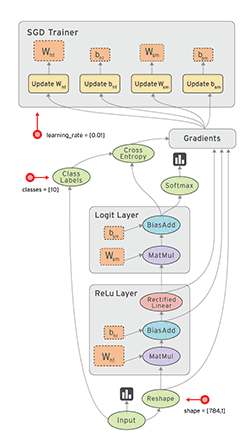


## 특징

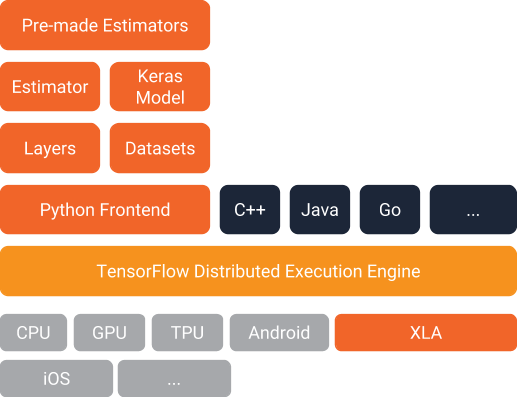

- 코드 수정 없이 데스크톱, 서버 혹은 모바일 디바이스에서 CPU나 GPU를 사용하여 연산을 구도할 수 있음.

- 분산(distributed) 환경에서 실행 가능함.

- 단순한 아이디어 테스트부터 서비스 단계까지 모두 이용 가능함.

- 참고 할것. https://www.tensorflow.org/

## Tensor(텐서)

- 컴퓨터 과학에서 배열(array)는 번호(index)와 각 번호에 대응하는 값들로 데이루어진 데이터 형태

- 간단히 말해, 다차원의 배열을 통칭
- 여러 차원을 가진 배열

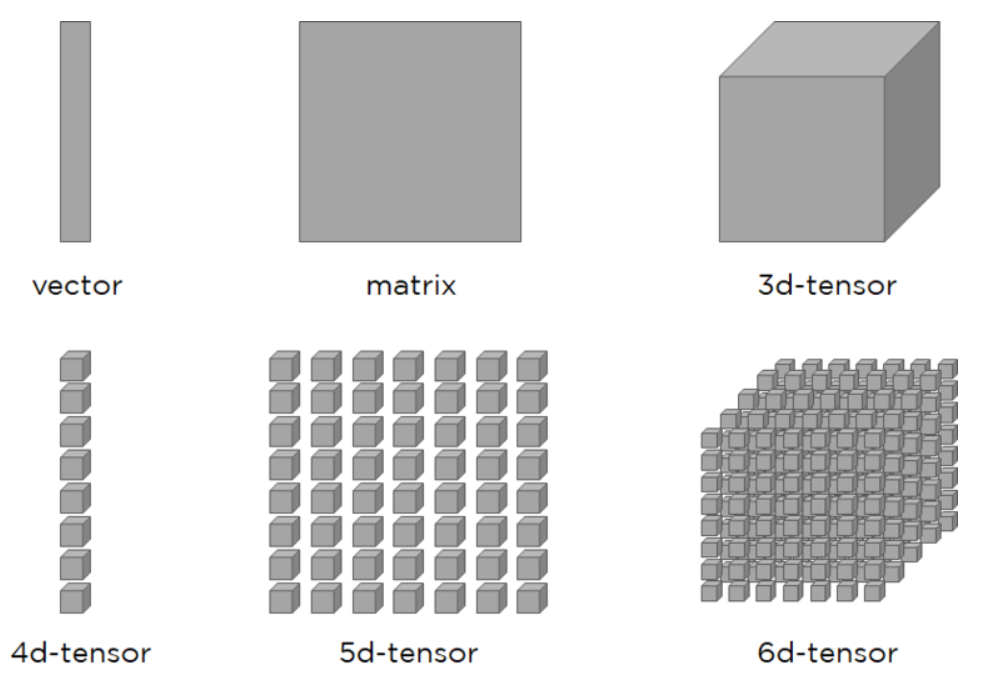

In [2]:
import tensorflow as tf

# 텐서 생성
# ---------------------------------------------
# 스칼라, 벡터, 행렬, 3D 텐서
a = tf.constant(3)
b = tf.constant([1, 2, 3])
c = tf.constant([[1, 2], [3, 4], [5, 6]])
d = tf.random.normal([2, 3, 4])  # 2×3×4 랜덤 텐서

print("스칼라:", a)
print("벡터:", b)
print("행렬:\n", c)
print("3D 텐서 shape:", d.shape)

# 기본 연산

x = tf.constant([1.0, 2.0, 3.0])
y = tf.constant([4.0, 5.0, 6.0])

print("덧셈:", x + y)
print("요소곱:", x * y)
print("내적:", tf.tensordot(x, y, axes=1))
print("평균:", tf.reduce_mean(x))

# 행렬 연산
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

print("\n행렬곱(matmul):\n", tf.matmul(A, B))
print("전치(transpose):\n", tf.transpose(A))
print("행렬식(det):", tf.linalg.det(A))
print("역행렬(inv):\n", tf.linalg.inv(A))

# 인덱싱과 슬라이싱
t = tf.reshape(tf.range(12), (3, 4))
print("\n전체 텐서:\n", t.numpy())
print("첫 행:", t[0].numpy())
print("두 번째 열:", t[:, 1].numpy())
print("부분 슬라이싱 (1~2행, 1~3열):\n", t[1:3, 1:3].numpy())

# 브로드캐스팅
m = tf.random.uniform((3, 1))
n = tf.random.uniform((1, 4))
print("\n브로드캐스팅 결과 shape:", (m + n).shape)

# GPU 사용 여부 확인
if tf.config.list_physical_devices('GPU'):
    print("\nGPU 사용 가능:", tf.config.list_physical_devices('GPU'))
else:
    print("\nCPU 모드로 실행 중")

# 자동미분 (GradientTape)
# y = x² + 2x + 1 의 미분 계산
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**2 + 2*x + 1
grad = tape.gradient(y, x)
print("\n미분 결과 dy/dx =", grad.numpy())

#NumPy 변환
arr = t.numpy()
print("\nNumPy 배열 타입:", type(arr))
print(arr)


스칼라: tf.Tensor(3, shape=(), dtype=int32)
벡터: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
행렬:
 tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)
3D 텐서 shape: (2, 3, 4)
덧셈: tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
요소곱: tf.Tensor([ 4. 10. 18.], shape=(3,), dtype=float32)
내적: tf.Tensor(32.0, shape=(), dtype=float32)
평균: tf.Tensor(2.0, shape=(), dtype=float32)

행렬곱(matmul):
 tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
전치(transpose):
 tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
행렬식(det): tf.Tensor(-2.0, shape=(), dtype=float32)
역행렬(inv):
 tf.Tensor(
[[-2.   1. ]
 [ 1.5 -0.5]], shape=(2, 2), dtype=float32)

전체 텐서:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
첫 행: [0 1 2 3]
두 번째 열: [1 5 9]
부분 슬라이싱 (1~2행, 1~3열):
 [[ 5  6]
 [ 9 10]]

브로드캐스팅 결과 shape: (3, 4)

GPU 사용 가능: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

미분 결과 dy/dx = 8.0

NumPy 배열 타입: <class 'numpy.ndarray'>
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
# tf.function을 사용하지 않은 함수
def square_pos(x):
  if x>0:
    x = x * x
  else :
    x = x* -1
  return x
square_pos

219 ns ± 86.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# tf.function을 사용하는 함수
@tf.function
def square_pos(x):
  if x>0:
    x = x * x
  else :
    x = x* -1
  return x
square_pos

118 µs ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- 원소별 연산
     - 텐서에 있는 각 원소에 독립적으로 적용됨.

- relu함수와 naive_relu의 차이를 비교.

In [ ]:
import numpy as np

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2 #rank-2
    x = x.copy() #입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
x = np.array([[-1,2],[3,4]])
print(naive_relu(x))

[[0 2]
 [3 4]]


In [ ]:
x = np.array([[[1,2],[3,4],[5,6]]])
print(x.shape)
print(naive_relu(x))

(1, 3, 2)


AssertionError: ignored

In [ ]:
naive_relu(x)

AssertionError: ignored

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2 #rank-2
    assert x.shape == y.shape
    x = x.copy() #입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] #원소 별로 더함.
    return x

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[[5,6],[7,8],[9,10]]])
naive_add(x,y)

AssertionError: ignored

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.00 s


- 브로드 캐스팅

In [ ]:
x

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

(32, 10)


In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 #rank-2 numpy array
    assert len(y.shape) == 1 # y : numpy array
    assert x.shape[1] == y.shape[0]
    x = x.copy() #입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
naive_add_matrix_and_vector(X,y)

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

- 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1 # x : numpy array
    assert len(y.shape) == 1 # y : numpy array
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # x : numpy array
    assert len(y.shape) == 1 # y : numpy array
    assert x.shape[1] == y.shape[0] # #x col  = # y row
    z = np.zeros(x.shape[0]) # x의 행과 같은 크기의 0이 채워진 벡터를 만듦.
    for i in range(x.shape[0]): #x행 반복
        for j in range(x.shape[1]): #y열 반복
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 계산 그래프를 활용한 자동 미분
    - 자동 미분은 신경망 학습을 위한 역전파와 같은 머신러닝 알고리즘을 구현하는 데 유용합니다.

- In effect, allowing gradients on integer tensors was causing incorrectness in tf.while_loop, and there was no satisfactory way to resolve them without this change.

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
print(x)
with tf.GradientTape() as tape: # Propagation
    y = 2 *x + 3
grad_of_y_wrt_x = tape.gradient(y, x) #backpropagation

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


- The reason is that tf.gradient doesn't propagate the gradients through integer tensors. This has been referenced in this github issue:
    - 출처 : https://stackoverflow.com/questions/55298323/tensorflow-2-0-returns-unexpected-output-on-dtype-int32-with-gradienttape

- However, it seems as of version 1.9, the behavior of tf.gradients() has been changed so that it no longer backpropagates through integer tensors.
    - 출처 : https://github.com/tensorflow/tensorflow/issues/20524

In [ ]:
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
tape.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
tape.gradient(x, y)

RuntimeError: ignored

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.7196119, 0.7196119],
        [1.1317617, 1.1317617]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

- 다른 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

- Gradient 계산
    - 자동으로 미분하기 위해 TensorFlow는 정방향 패스 동안 어떤 연산이 어떤 순서로 발생하는지 기억해야 합니다. 그런 다음 역방향 패스 동안 TensorFlow는 이 연산 목록을 역순으로 이동하여 그래디언트를 계산합니다.

- 그래디언트 테이프
    - 텐서플로는 자동 미분(주어진 입력 변수에 대한 연산의 그래디언트(gradient)를 계산하는 것)을 위한 tf.GradientTape API를 제공합니다. tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록"합니다. 그 다음 텐서플로는 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산합니다.

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

- 일부 연산을 기록한 후에는 GradientTape.gradient(target, sources)를 사용하여 일부 소스(종종 모델 변수)에 상대적인 일부 대상(종종 손실)의 그래디언트를 계산합니다.

In [ ]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

- 위의 예제는 스칼라를 사용하지만, tf.GradientTape는 모든 텐서에서 쉽게 작동합니다.

In [ ]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

- 두 변수 모두에 대해 loss의 그래디언트를 가져오려면, 두 변수를 gradient 메서드에 소스로 전달할 수 있습니다. 테이프는 소스가 전달되는 방식에 대해 융통성이 있으며 목록 또는 사전의 중첩된 조합을 허용하고 같은 방식으로 구조화된 그래디언트를 반환합니다

In [ ]:
print(tape.gradient(loss, [w, b]))

[None, None]


In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [ ]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 4.9828606 ,  0.17991436],
       [ 9.965721  ,  0.3598287 ],
       [14.948582  ,  0.53974307]], dtype=float32)>

In [ ]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.9828606 , 0.17991436], dtype=float32)>

In [ ]:
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.9828606 , 0.17991436], dtype=float32)>

- 모델에 대한 그래디언트
검사점 설정 및 내보내기를 위해 tf.Variables를 tf.Module 또는 해당 서브 클래스(layers.Layer와 keras.Model) 중 하나로 수집하는 것이 일반적입니다.

대부분의 경우 모델의 훈련 가능한 변수에 대한 그래디언트를 계산하려고 합니다. tf.Module의 모든 서브 클래스는 Module.trainable_variables 속성에서 변수를 집계하므로 몇 줄의 코드로 이러한 그래디언트를 계산할 수 있습니다

In [ ]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [ ]:
for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


- 테이프의 감시 대상 제어하기
    - 기본 동작은 훈련 가능한 tf.Variable에 액세스한 후 모든 연산을 기록하는 것입니다. 그 이유는 다음과 같습니다.

    - 테이프는 역방향 패스의 그래디언트를 계산하기 위해 정방향 패스에 기록할 연산을 알아야 합니다.
    - 테이프는 중간 출력에 대한 참조를 보유하므로 불필요한 연산을 기록하지 않습니다.
    - 가장 일반적인 사용 사례는 모든 모델의 훈련 가능한 변수에 대해 손실의 그래디언트를 계산하는 것입니다.

예를 들어, 다음은 tf.Tensor가 기본적으로 "감시"되지 않고 tf.Variable을 훈련할 수 없기 때문에 그래디언트를 계산하지 못합니다.

In [ ]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


- GradientTape.watched_variables 메서드를 사용하여 테이프에서 감시 중인 변수를 나열할 수 있습니다.

In [ ]:
[var.name for var in tape.watched_variables()]

['x0:0']

tf.GradientTape는 사용자가 감시 대상 또는 감시 예외 대상을 제어할 수 있는 후크를 제공합니다.

tf.Tensor에 대한 그래디언트를 기록하려면 GradientTape.watch(x)를 호출해야 합니다.

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


- 반대로, 모든 tf.Variables을 감시하는 기본 동작을 비활성화하려면, 그래디언트 테이프를 만들 때 watch_accessed_variables=False를 설정합니다. 이 계산은 두 가지 변수를 사용하지만, 변수 중 하나의 그래디언트만 연결합니다.

In [ ]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

- x0에서 GradientTape.watch가 호출되지 않았으므로 이에 대한 그래디언트가 계산되지 않습니다.

In [ ]:
# dys/dx1 = exp(x1) / (1 + exp(x1)) = sigmoid(x1)
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 0.9999546


- 중간 결과
    - tf.GradientTape 컨텍스트 내에서 계산된 중간값과 관련하여 출력의 그래디언트를 요청할 수도 있습니다.

In [ ]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x
  z = y * y

# Use the tape to compute the gradient of z with respect to the
# intermediate value y.
# dz_dy = 2 * y and y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


기본적으로, GradientTape.gradient 메서드가 호출되면 GradientTape가 보유한 리소스가 해제됩니다. 동일한 계산에 대해 여러 그래디언트를 계산하려면 persistent=True 그래디언트 테이프를 만듭니다. 이렇게 하면 테이프 객체가 가비지 수집될 때 리소스가 해제되면 gradient 메서드를 여러 번 호출할 수 있습니다. 예를 들면 다음과 같습니다.

In [ ]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


In [ ]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


In [ ]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75


In [ ]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]

print(tape.gradient(y, x).numpy())

7.0


In [ ]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

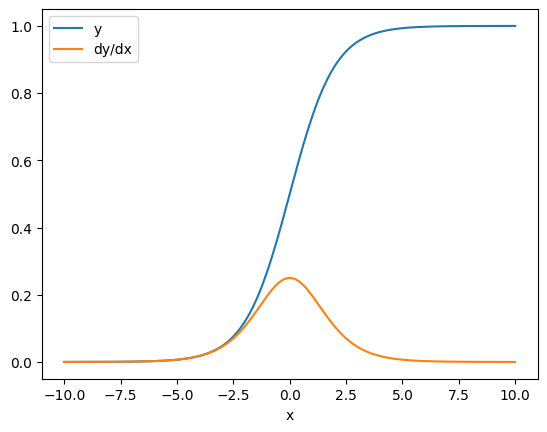

In [ ]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

- XOR 문제를 Tensorflow로 구현해보자.

## 1. Sequential API
- https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

- layer 흐름이 순차적인 경우 사용(layer-by-layer), 여러 층을 단순히 일렬로 연결하여 이루어진 모델

- tensor가 이전 layer에서 다음 layer로 바로 이어질 때에 사용 가능.

- 장점 : 직관적이고 편리함.

- 단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다.
    - 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 Neural Network은 구현할 수 없음.
    - 이런 모델들의 구현은 Functional API를 사용해야 합니다.

In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #(fully connected)
from tensorflow.keras.optimizers import SGD #(Stochastic gradient descent)
from tensorflow.keras.losses import mse #(mean square error)

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

#모델 구성하기
model = Sequential()
#단층 퍼셉트론을 구성
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))

#모델 준비하기
model.compile(optimizer = 'SGD',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달
#학습시키기
model.fit(x,y,epochs = 500)

In [ ]:
model.summary()

In [ ]:
model.get_weights()

In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

# XOR gate이기 때문에 y값은 0,1,1,0임

#모델 구성하기

model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) # 32개로 여러개로 쌓음.
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델 준비하기

model.compile(optimizer = 'adam',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달

#학습시키기

model.fit(x,y,epochs = 500)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2485 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2481 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2476 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2471 - acc: 0.5000
Epoch 5/500
1/1 [=========================

- custom model

<center>
<img src='https://i.imgur.com/oXtaaRV.png'>
</center>

- 출처 : https://velog.io/@lighthouse97/Tensorflow%EB%A1%9C-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EB%A7%8C%EB%93%9C%EB%8A%94-3%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01),name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 시각화
    - plot_model을 이용하면 신경망 모델을 시각화 할 수 있음.
    - plot_model(model, to_file='model.png') 이렇게 지정하면 저장할 수 있음.
    - plot_model(model, show_shapes=True)이면 층의 형태와 함께 시각화가 가능함.

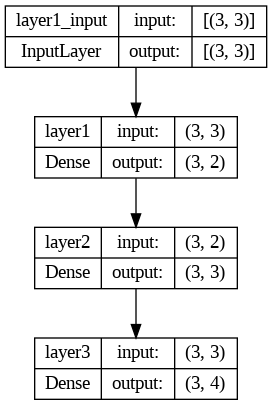

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

## Activation Functions

각 함수와 함수의 미분에 대해서 figure 보자.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

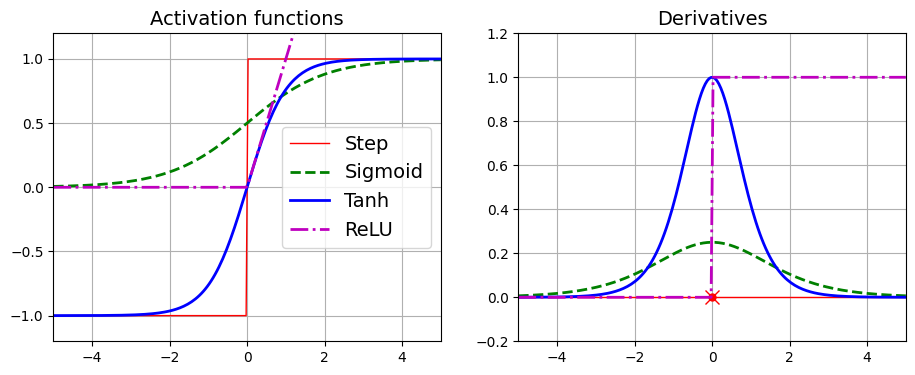

In [ ]:
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## Functional API
- Functional API : https://www.tensorflow.org/guide/keras/functional?hl=ko
- Input : https://www.tensorflow.org/api_docs/python/tf/keras/Input
- Model : https://www.tensorflow.org/api_docs/python/tf/keras/Model
    - Model groups layers into an object with training and inference features.

- 입력 데이터의 크기(shape)을 Input() 함수의 인자로 입력층을 저의해주어야 함.

- 이전 층을 다음층 함수의 입력으로 사용하고, 변수에 할당.

- Model() 함수에 입력과 출력을 정의함.

- Sequential API보다는 훨씬 더 유연한 적용이 가능함.


- 장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.

- 단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

Functional API로 모델을 생성하는 법
1. 입력노드를 생성한다.
2. 입력노드가 레이어간 어떻게 이동하는 지를 그래프 그리듯 명시한다.

In [ ]:
import tensorflow as tf
import numpy as np

## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[0.], [1.], [1.], [0.]]

## tf.keras를 활용한 perceptron 모델 구현.
input_Layer = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation='sigmoid')(input_Layer)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary() # 층을 쌓은걸 볼수 있다.


# 모델 loss, 학습 방법 결정하기
optimizer=tf.keras.optimizers.SGD(lr=0.7) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.binary_crossentropy  ## 예측값 과 정답의 오차값 정의. mse는 mean squre error로 (예측값 - 정답)^2 를 의미
metrics=tf.keras.metrics.binary_accuracy ### 학습하면서 평가할 메트릭스 선언언

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=100, batch_size=4)
#batch_size ->gpu 용량이 적다->OOM(out of memory)
# model.fit(x_data,y_data, epochs=1000,)


- custom model

<center>
<img src='https://i.imgur.com/52cCctj.png'>
</center>


    - 출처 : https://velog.io/@lighthouse97/Tensorflow%EB%A1%9C-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EB%A7%8C%EB%93%9C%EB%8A%94-3%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 30)                   930       ['dense_2[0][0]']             
                                                                                            

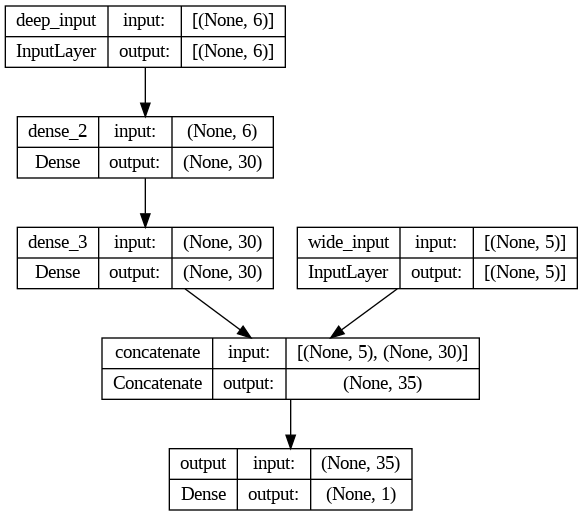

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## 학습률에 따른 경사하강법(백견불여일타 책 참고)

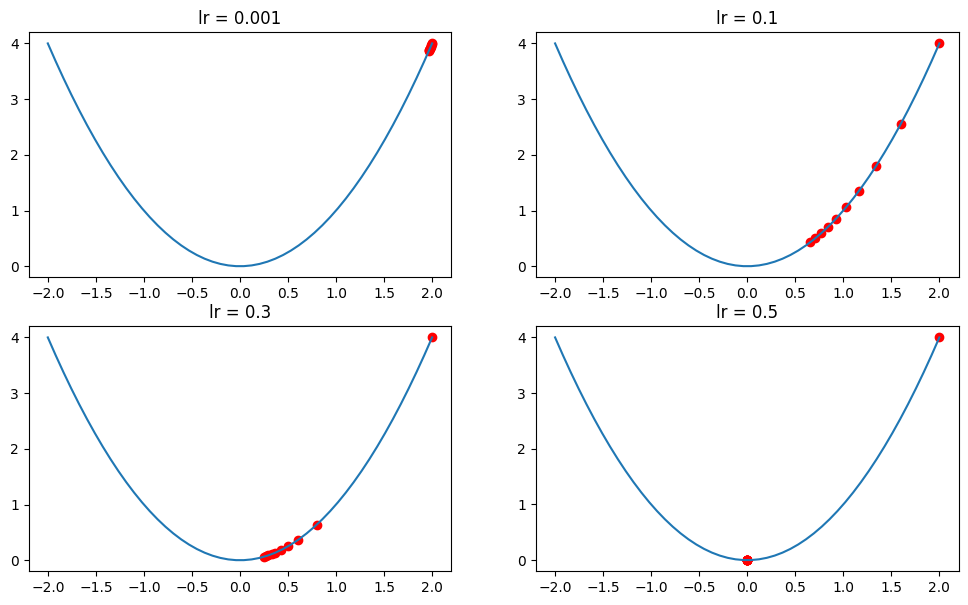

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.1, 0.3, 0.5]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50)
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

- Class 수업
    - Class(클래스) : 객체를 만드는 구조/틀
    - instance : 클래스가 실질적으로 객체를 만들었을 때, 그 객체를 부르는 용어

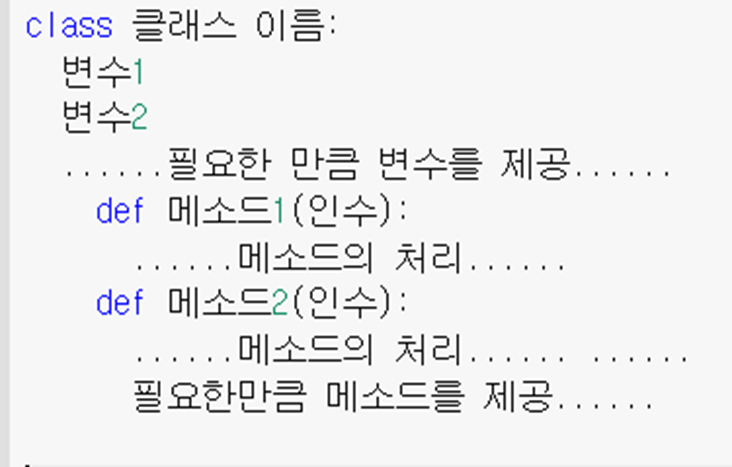

- 참고 : https://leffept.tistory.com/441#:~:text=classmethod%20%EB%9E%80%3F,%EC%97%90%20%EC%A0%91%EA%B7%BC%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.

In [ ]:
class MyClass():
    class_var = '클래스 변수'

    #데코레이터를 사용해서 클래스에 메서드를 선언하면 해당 메서드는 클래스(class) 메서드
    @classmethod
    def class_method(cls):
        print('클래스 메서드')
    def instance_method(self):
        self.instance_var = '인스턴스 변수'
        print('인스턴스의 메소드')

In [ ]:
class Account():
    def make_account(self): #self : 인스턴스를 위한 placeholder
        self.balance=0
    def deposit(self,money):
        self.balance +=money
    def draw(self,money):
        self.balance -=money

In [ ]:
a1 = Account()
a1.make_account()
a1.deposit(1000)
print(a1.balance)

In [ ]:
a2 = Account()
a2.make_account()
a2.deposit(500)
print(a2.balance)

500


In [ ]:
Account.balance

AttributeError: ignored

- 인스턴스 메소드
    - 인스턴스 메소드의 매개변수 중 가장 첫번째는 인스턴스 자리

In [ ]:
class person():
    def __init__(self):
        self.age = 17

In [ ]:
p1=person()

In [ ]:
p1.age

17

In [ ]:
class TestClass1():
    def __init__(self,in1,in2):
        self.v1 = in1
        self.v2 = in2

In [ ]:
t_cls = TestClass1(10,20)

TypeError: ignored

In [ ]:
t_cls.v1,t_cls.v2

(10, 20)

In [ ]:
class ClassExample:
    def __init__(self, name, age): #생성자(Constructor) 생성시 자동 수행
        self.name = name
        self.age = age +5 #변수 생성 후 파라미터로 보낸 값" 할당
        print('[생성자] self와 변수 비교' + str(self.age)+"age : "+str(age))
        print("[생성자] 이름 :" +self.name+"나이 : "+str(self.age))
    def ten_year_call(self,val): #함수
        return self.age+10

In [ ]:
a = ClassExample("철수",20) #객체화(ClassExample의 정보를 a에 담음)
print(a.age)
print(a.ten_year_call(50))

[생성자] self와 변수 비교25age : 20
[생성자] 이름 :철수나이 : 25
25
35


- ClassMethod

In [ ]:
class Account2():
    bank = '모두은행'
    total=0

    @classmethod
    def merge(cls,acc1,acc2):
        cls.total = acc1.balance+acc2.balance
        print('당신의 재산은 %d' %cls.total)
    def __init__(self):
        self.balance = 0
    def deposit(self, money):
        self.balance +=money
    def draw(self,money):
        self.balance -=money


In [ ]:
b1 = Account()
b1.make_account()
b1.deposit(4000)
print(b1.balance)

In [ ]:
b2 = Account()
b2.make_account()
b2.deposit(700)
print(b2.balance)

In [ ]:
Account2.merge(b1,b2)

당신의 재산은 4700


In [ ]:
Account2.total

4700

3. Subclass

- 두 구현방법은 모두 사용할 층과 연결방식을 먼저 정의하는 것이 필요함.

- 모델을 분석/디버깅이 쉬우며, 다른 곳에서 사용하기도 복사나 공유를 통해서 쉽게 가능함. 하지만 어떤 모델에서는 반복/조건문이 필요하거나 다양한 크기를 다뤄야 할 수 있는데, 두 방법은 불가능함.
    - 가장 유연하게 할 수 있는 동적인 구조가 필요함. 명령형(imperative) 프로그래밍이 필요하다면 이용하는 것이 subclass API이다.

- 장점 : Funtional API로도 구현할 수 없는 모델들조차 구현이 가능함.

- 단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다로움.

[방법1] tf.keras.Layer를 상속받아 custom layer만들기

In [ ]:
import tensorflow as tf

In [ ]:
class MyLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyLayer, self).__init__()
        self.d1 = tf.keras.layers.Dense(64, activation = 'relu')
        self.d2 = tf.keras.layers.Dense(10, activation = 'softmax')

    def call(self, x):
        x = self.d1(x)
        return self.d2(x)


In [ ]:
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성

# layer 생성
outputs = MyLayer()(inputs)

# Model 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 my_layer (MyLayer)          (None, 10)                50890     
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


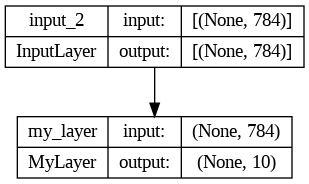

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

[방법2]tf.keras.Model을 상속받아 custom Model 만들기

In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 clear
tf.keras.backend.clear_session()

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(64, activation='relu')
        self.d2 = tf.keras.layers.Dense(10, activation='softmax')

    # method overriding
    # call method는 fit() 메소드가 호출되어 훈련하는 경우 호출되는 함수
    # call 함수 내부에 모델의 입력부터 출력까지 순전파(forward propagation)을 정의하고
    # functional API와 같은 방식으로 모든 레이어를 연결하여 출력값을 return 한다
    def call(self, input):
        x = self.d1(input)
        return self.d2(x)

model = MyModel()

In [ ]:
model = MyModel()
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성
model(inputs)
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             multiple                  50240     
                                                                 
 dense_3 (Dense)             multiple                  650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


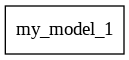

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer() # 주어진 평균 (mean)과 표준편차 (stddev)를 갖는 정규분포로부터 샘플링된 값을 갖는 Tensor를 생성하는 방식
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer() # 모두 0의 값을 갖는 텐서를 생성하는 Initializer입니다.
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
keras.backend.clear_session()

# pytorch와 비슷한 방법
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return x

    def summary(self):
        inputs = Input((1, 10))
        Model(inputs, self.call(inputs)).summary()

# input입력으로 모델 생성(build를 해야하며, input_shape를 넣어줌)
model = MyModel()
model.build(input_shape=(1,10)) # (1, feature)

# 모델 요약
model.summary()

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 dense (Dense)               (None, 1, 64)             704       
                                                                 
 dense_1 (Dense)             (None, 1, 10)             650       
                                                                 
Total params: 1354 (5.29 KB)
Trainable params: 1354 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


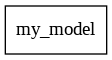

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

- 선형 회귀를 기반 심층 신경망 예제 코드를 작성하고 실습해보자.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 1s 5ms/step - loss: 29.3919
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1042
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1147
Epoch 4/1000
5/5 [============================

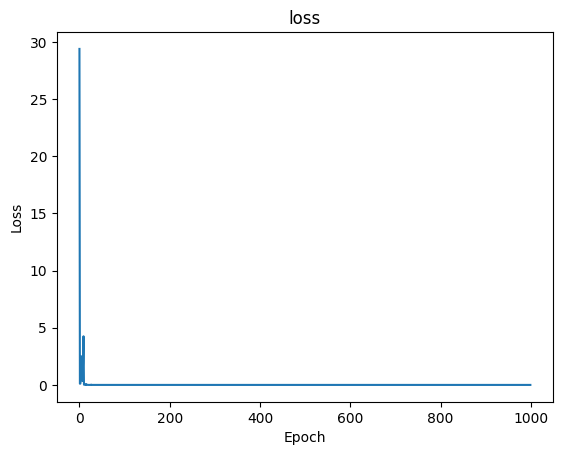

13/13 [==============================] - 0s 2ms/step


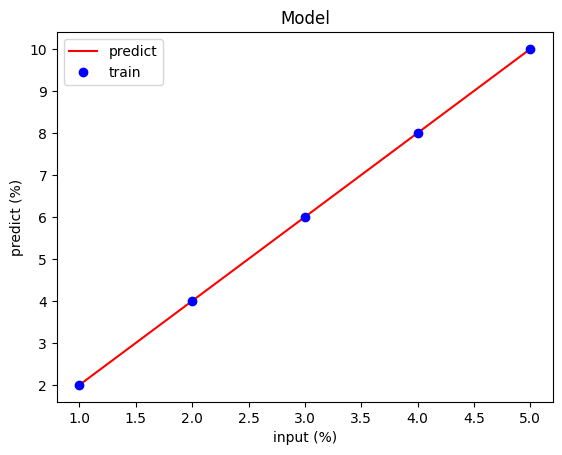

loss :  0.0
1/1 [==============================] - 0s 48ms/step
input : 1, output : [[2.]]
1/1 [==============================] - 0s 18ms/step
input : 2, output : [[4.]]
1/1 [==============================] - 0s 17ms/step
input : 3, output : [[6.]]
1/1 [==============================] - 0s 23ms/step
input : 4, output : [[8.]]
1/1 [==============================] - 0s 20ms/step
input : 5, output : [[10.]]
1/1 [==============================] - 0s 20ms/step
input : 6, output : [[12.]]
1/1 [==============================] - 0s 16ms/step
input : 7, output : [[14.]]
1/1 [==============================] - 0s 17ms/step
input : 99, output : [[197.99998]]


In [ ]:
# 단순한 선형 회귀 예제 (텐서플로우2)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# x(입력), y(결과) 데이터
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 6, 8, 10])

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1, activation='linear'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1))

# 모델 구조 확인
model.summary()

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error', optimizer=sgd)

#fit the line
# 텐서 플로우 1과 다르게 세션을 만들어서 돌릴 필요가 없다.
# 간단하게 만들어서 학습을 시작한다.
hist = model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=1)

# 훈련 과정 시각화 (손실)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 모델 시각화
line_x = np.arange(min(x_train), max(x_train), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_train, y_train, 'bo')
plt.title('Model')
plt.xlabel('input (%)')
plt.ylabel('predict (%)')
plt.legend(['predict', 'train'], loc='upper left')
plt.show()

# 손실 함수 계산
loss = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
print('loss : ', loss)

# 모델 테스트
for i in range(1, 8):
    print('input : ', i, ', output : ', model.predict(np.array([i])), sep='')  # 입력 i에 대한 예측 값 출력

print('input : ', 99, ', output : ', model.predict(np.array([99])), sep='')

### 자동차 연비 예측하기 : 회귀

- 출처 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko


*회귀* 문제에서 목표는 가격이나 확률과 같은 연속된 값의 출력을 예측하는 것입니다. 이것은 클래스 목록에서 클래스를 선택하는 것이 목적인 *분류* 문제(예: 그림에 사과나 오렌지가 포함되어 있고 어떤 과일이 그림에 있는지 인식)와 대조됩니다.

이 튜토리얼은 고전적인 [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) 데이터세트를 사용하고 1970년대 후반과 1980년대 초반 자동차의 연비를 예측하는 모델을 구축하는 방법을 보여줍니다. 이를 위해 해당 기간의 많은 자동차에 대한 설명을 모델에 제공해야 합니다. 이 설명에는 실린더, 배기량, 마력 및 무게와 같은 속성이 포함됩니다.

이 예에서는 Keras API를 사용합니다. (자세한 내용은 Keras [튜토리얼](https://www.tensorflow.org/tutorials/keras) 및 [가이드](https://www.tensorflow.org/guide/keras)를 참조하세요.)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


## Auto MPG 데이터셋

이 데이터세트는 [UCI 머신 러닝 리포지토리](https://archive.ics.uci.edu/ml/)에서 다운로드할 수 있습니다.


- mpg는 miles per gallon의 약자로 연비

### 데이터 구하기

먼저 데이터셋을 다운로드합니다.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### 데이터 정제하기

데이터세트에는 몇 가지 알 수 없는 값이 포함되어 있습니다.

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

이 초기 튜토리얼을 간단하게 유지하려면 해당 행을 삭제하세요.

In [ ]:
dataset = dataset.dropna()

`"Origin"` 열은 숫자가 아닌 범주형입니다. 따라서 다음 단계는 [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)를 사용하여 열의 값을 원-핫 인코딩하는 것입니다.

참고: 이러한 종류의 변환을 수행하도록 `tf.keras.Model`을 설정할 수 있지만 이 내용은 본 튜토리얼의 범위를 벗어납니다. 예를 보려면 [Keras 사전 처리 레이어를 사용하여 구조화된 데이터 분류](../structured_data/preprocessing_layers.ipynb) 또는 [CSV 데이터 로드](../load_data/csv.ipynb) 튜토리얼을 확인하세요.

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### 데이터를 훈련 세트와 테스트 세트로 분할

이제 데이터세트를 훈련 세트와 테스트 세트로 분할합니다. 모델의 최종 평가에 테스트 세트를 사용합니다.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### 데이터 조사하기

훈련 세트에서 몇 쌍의 열에 대한 공동 분포를 검토합니다.

맨 위 행은 연비(MPG)가 다른 모든 매개변수의 함수임을 나타냅니다. 다른 행은 각각이 서로 간의 함수임을 나타냅니다.

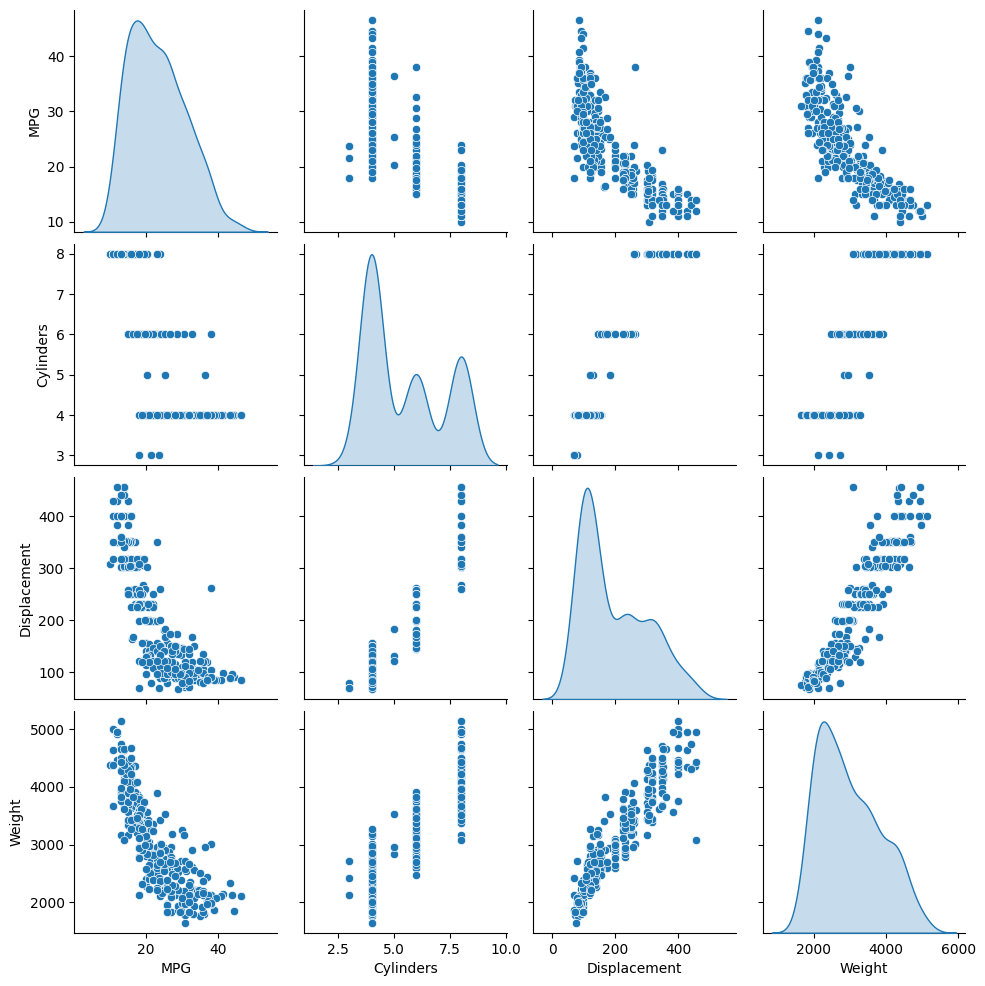

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

전체 통계도 확인해보겠습니다. 각 특성이 매우 다른 범위를 포괄하고 있는 것에 주목하세요.

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### 특성과 레이블 분리하기

특성에서 대상 값("레이블")을 분리합니다. 이 레이블은 예측하도록 모델을 훈련할 값입니다.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## 정규화

통계 표에서 각 특성의 범위가 얼마나 다른지 쉽게 알 수 있습니다.

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


특성의 스케일과 범위가 다르면 정규화(normalization)하는 것이 권장됩니다. 특성을 정규화하지 않아도 모델이 *수렴할 수 있지만*, 훈련시키기 어렵고 입력 단위에 의존적인 모델이 만들어집니다.

이것이 중요한 한 가지 이유는 특성에 모델 가중치가 곱해지기 때문입니다. 따라서 출력의 스케일과 그래디언트의 스케일은 입력 스케일의 영향을 받습니다.

모델은 특성 정규화 없이 수렴할 *수도* 있지만 정규화는 훈련을 훨씬 더 안정적으로 만듭니다.

참고: 원-핫 기능을 정규화하는 데에는 이점이 없습니다. 여기서는 단순성을 위해 수행했습니다. 전처리 레이어를 사용하는 방법에 대한 자세한 내용은 [전처리 레이어 작업하기](https://www.tensorflow.org/guide/keras/preprocessing_layers) 가이드 및 [Keras 전처리 레이어를 사용하여 구조화된 데이터 분류](../structured_data/preprocessing_layers.ipynb) 튜토리얼을 참조하세요.

### 정규화 레이어

`tf.keras.layers.Normalization`은 모델에 특성 정규화를 추가하는 깔끔하고 간단한 방법입니다.

첫 번째 단계는 레이어를 만드는 것입니다.

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
#Defaults to -1, where the last axis of the input is assumed to be a feature dimension and is normalized per index.

그런 다음 `Normalization.adapt`를 호출하여 전처리 레이어의 상태를 데이터에 맞춥니다.

In [ ]:
normalizer.adapt(np.array(train_features))

평균과 분산을 계산하고 레이어에 저장합니다.

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


레이어가 호출되면 각 특성이 독립적으로 정규화된 입력 데이터를 반환합니다.

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## 선형 회귀

심층 신경망 모델을 구축하기 전에 하나 및 여러 변수를 사용하는 선형 회귀부터 시작합니다.

### 하나의 변수를 사용한 선형 회귀

단일 변수 선형 회귀로 시작하여 `'Horsepower'`에서 `'MPG'`를 예측합니다.

`tf.keras`를 사용하여 모델을 교육할 때는 일반적으로 모델 아키텍처를 정의하는 것으로 시작합니다. [일련의 단계를 나타내는](https://www.tensorflow.org/guide/keras/sequential_model) `tf.keras.Sequential` 모델을 사용합니다.

단일 변수 선형 회귀 모델에는 두 단계가 있습니다.

- `tf.keras.layers.Normalization` 전처리 레이어를 사용하여 `'Horsepower'` 입력 특성을 정규화합니다.
- 선형 변환($y = mx+b$)을 적용하여 선형 레이어(`tf.keras.layers.Dense`)로 1개의 출력을 생성합니다.

*입력*의 수는 `input_shape` 인수로 설정하거나 모델이 처음 실행될 때 자동으로 설정할 수 있습니다.

먼저 `'Horsepower'` 특성으로 구성된 NumPy 배열을 만듭니다. 그런 다음 `tf.keras.layers.Normalization`을 인스턴스화하고 상태를 `horsepower` 데이터에 맞춥니다.

In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

Keras 순차 모델 빌드:

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


이 모델은 `'Horsepower'`로부터 `'MPG'`를 예측합니다.

처음 10개의 'Horsepower' 값에 대해 훈련되지 않은 모델을 실행합니다. 결과는 좋지 않지만 예상되는 모양 `(10, 1)`을 가지고 있습니다.

In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 83ms/step


array([[-0.728],
       [-0.411],
       [ 1.344],
       [-1.021],
       [-0.923],
       [-0.362],
       [-1.094],
       [-0.923],
       [-0.241],
       [-0.411]], dtype=float32)

모델이 빌드되면 `Model.compile` 메서드를 사용하여 훈련 절차를 구성합니다. 컴파일에 가장 중요한 인수는 `loss` 및 `optimizer`입니다. 이들이 최적화 대상(`mean_absolute_error`)과 방식(`tf.keras.optimizers.Adam` 사용)을 정의하기 때문입니다.

In [ ]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Keras `Model.fit`을 사용하여 100 epoch에 대한 훈련을 실행합니다.

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.35 s, sys: 476 ms, total: 5.82 s
Wall time: 6.44 s


`history` 객체에 저장된 통계를 사용하여 모델의 훈련 진행 상황을 시각화합니다.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.805151,4.186675,95
96,3.803948,4.202816,96
97,3.804121,4.183989,97
98,3.803591,4.189455,98
99,3.801786,4.192263,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

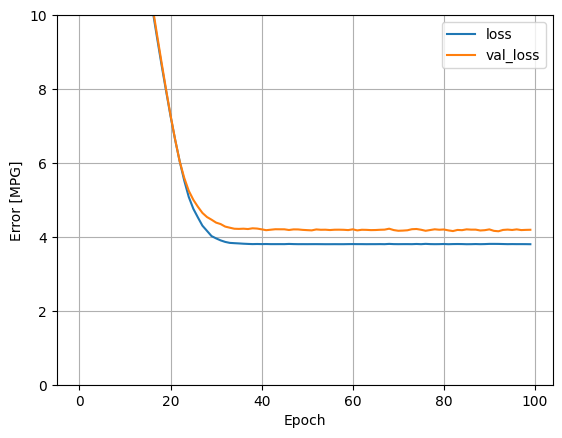

In [ ]:
plot_loss(history)

나중을 위해 테스트 세트에서 결과를 수집합니다.

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

이것은 단일 변수 회귀이므로 모델의 예측을 입력의 함수로 쉽게 볼 수 있습니다.

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

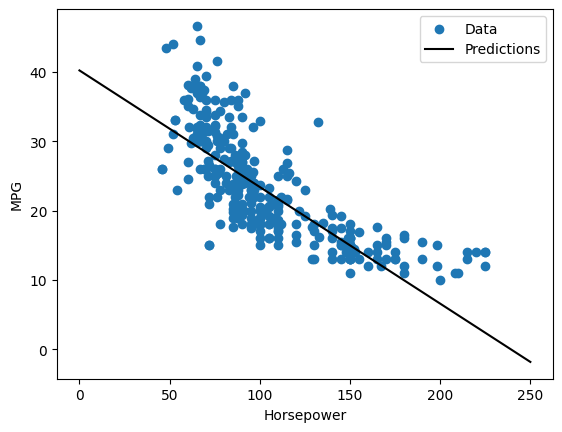

In [ ]:
plot_horsepower(x, y)

### 다중 입력이 있는 선형 회귀

거의 동일한 설정을 사용하여 여러 입력을 기반으로 예측할 수 있습니다. 이 모델은 $m$가 행렬이고 $b$가 벡터라는 점을 제외하고 여전히 동일한 $y = mx+b$를 수행합니다.

이전에 정의하고 전체 데이터세트에 적용한 `normalizer`(`tf.keras.layers.Normalization(axis=-1)`)의 첫 레이어를 사용하여 2단계 Keras Sequential 모델을 다시 생성합니다.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

입력 배치에 대해 `Model.predict`를 호출하면 각 예제에 대해 `units=1` 출력이 생성됩니다.

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 110ms/step


array([[-1.185],
       [-0.876],
       [ 3.825],
       [-2.282],
       [-3.356],
       [ 0.419],
       [-3.573],
       [-1.236],
       [ 0.848],
       [-2.126]], dtype=float32)

모델을 호출하면 가중치 행렬이 만들어집니다. `kernel` 가중치($y=mx+b$의 $m$)가 `(9, 1)` 모양인지 확인합니다.

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.755],
       [-0.032],
       [ 0.43 ],
       [ 0.772],
       [ 0.077],
       [-0.441],
       [ 0.352],
       [-0.039],
       [ 0.666]], dtype=float32)>

`Model.compile`을 사용하여 모델을 구성하고 `Model.fit`을 사용하여 100 epoch 동안 훈련합니다.

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.96 s, sys: 355 ms, total: 7.31 s
Wall time: 13.5 s


이 회귀 모델의 모든 입력을 사용하면 하나의 입력이 있는 `horsepower_model`보다 훨씬 더 낮은 훈련 및 검증 오류를 달성할 수 있습니다.

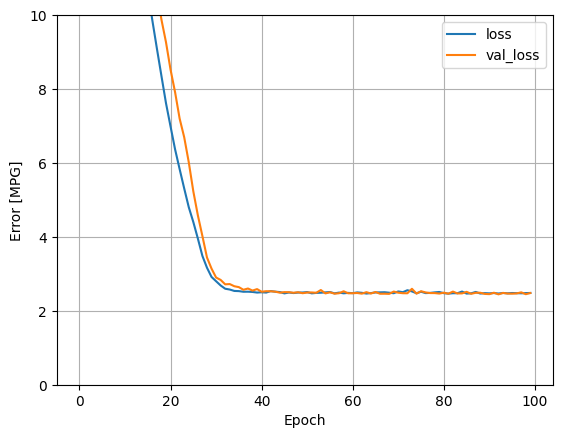

In [ ]:
plot_loss(history)

나중을 위해 테스트 세트에서 결과를 수집합니다.

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## 심층 신경망(DNN)을 사용한 회귀

이전 섹션에서는 단일 및 다중 입력에 대해 두 개의 선형 모델을 구현했습니다.

여기에서는 단일 입력 및 다중 입력 DNN 모델을 구현합니다.

코드는 일부 "숨겨진" 비선형 레이어를 포함하도록 모델이 확장된다는 점을 제외하고는 기본적으로 동일합니다. 여기서 "숨겨진"이라는 말은 입력 또는 출력에 직접 연결되지 않음을 의미합니다.

이러한 모델에는 선형 모델보다 몇 개의 레이어가 더 포함됩니다.

- 이전과 같은 정규화 레이어(단일 입력 모델의 경우 `horsepower_normalizer` 및 다중 입력 모델의 경우 `normalizer` 사용)
- ReLU(`relu`) 활성화 함수 비선형성이 있는 두 개의 숨겨진 비선형 `Dense` 레이어
- 선형 `Dense` 단일 출력 레이어

두 모델 모두 동일한 훈련 절차를 사용하므로 `compile` 메서드는 아래의 `build_and_compile_model` 함수에 포함됩니다.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### DNN과 단일 입력을 사용한 회귀

입력으로 `'Horsepower'`만 사용하고 정규화 레이어로 `horsepower_normalizer`(앞서 정의)를 사용하여 DNN 모델을 만듭니다.

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

이 모델은 선형 모델보다 훈련 가능한 매개변수가 훨씬 많습니다.

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Keras `Model.fit`으로 모델 훈련:

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.42 s, sys: 380 ms, total: 8.8 s
Wall time: 15.4 s


이 모델은 선형 단일 입력 `horsepower_model`보다 약간 더 우수합니다.

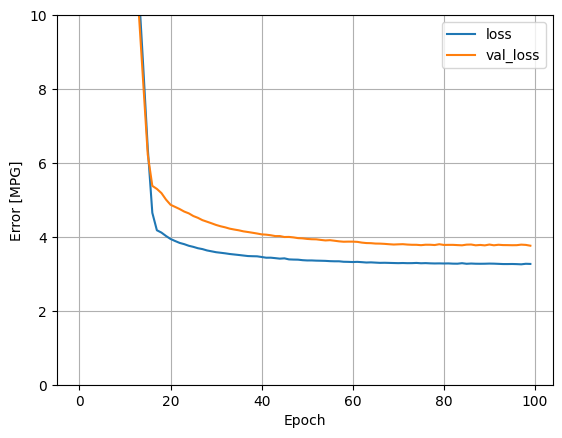

In [ ]:
plot_loss(history)

예측을 `'Horsepower'`의 함수로 플로팅하면 이 모델이 숨겨진 레이어에서 제공하는 비선형성을 어떻게 이용하는지 알 수 있습니다.

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


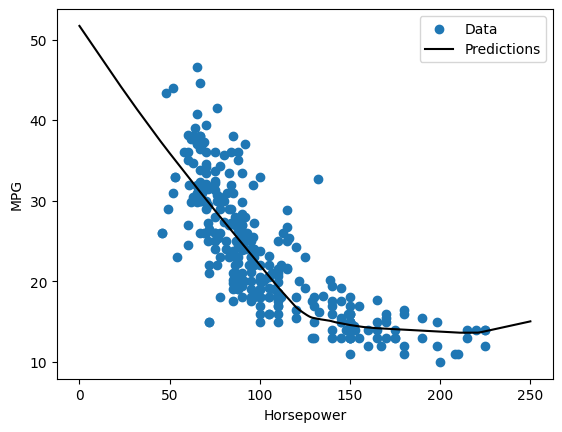

In [ ]:
plot_horsepower(x, y)

나중을 위해 테스트 세트에서 결과를 수집합니다.

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

### DNN 및 다중 입력을 사용한 회귀

모든 입력을 사용하여 이전 프로세스를 반복합니다. 모델의 성능은 검증 데이터세트에서 약간 향상됩니다.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.37 s, sys: 364 ms, total: 8.73 s
Wall time: 24.1 s


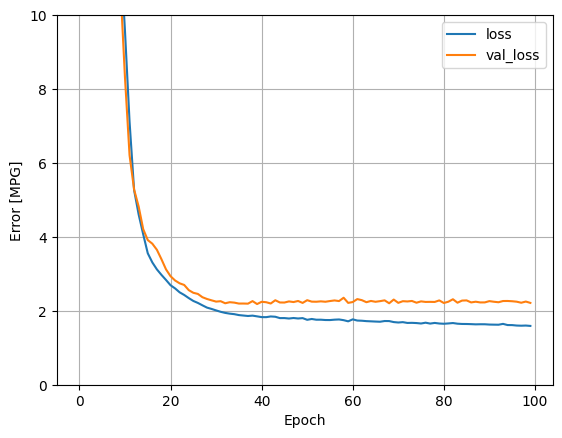

In [ ]:
plot_loss(history)

테스트 세트에서 결과를 수집합니다.

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## 성능

모든 모델이 학습되었으므로 테스트 세트 성능을 검토할 수 있습니다.

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.645337
linear_model,2.520107
dnn_horsepower_model,2.942067
dnn_model,1.641422


이러한 결과는 훈련 중에 관찰된 검증 오류와 일치합니다.

### 예측하기

이제 Keras `Model.predict`를 사용하여 테스트 세트에서 `dnn_model`로 예측을 수행하고 손실을 검토할 수 있습니다.

3/3 [==============================] - 0s 4ms/step


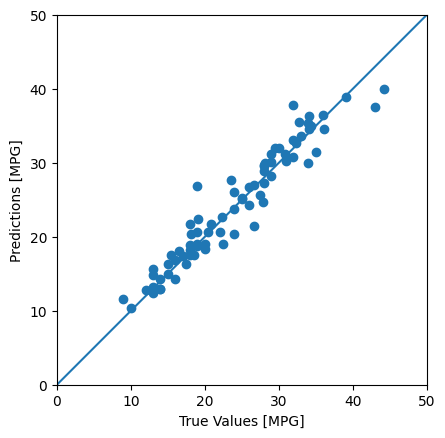

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


모델이 합리적으로 잘 예측하는 것으로 보입니다.

이제 오류 분포를 확인하세요.

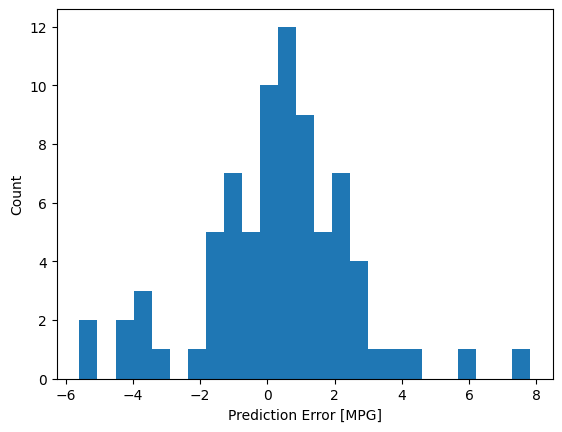

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

모델이 만족스러우면 나중에 사용할 수 있도록 `Model.save`로 저장합니다.

In [ ]:
dnn_model.save('dnn_model')

모델을 다시 로드하면 동일한 출력이 제공됩니다.

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.645337
linear_model,2.520107
dnn_horsepower_model,2.942067
dnn_model,1.641422
reloaded,1.641422


## 결론

이 노트북은 회귀 문제를 위한 기법을 소개합니다.

- 평균 제곱 오차(MSE)(`tf.keras.losses.MeanSquaredError`) 및 평균 절대 오차(MAE)(`tf.keras.losses.MeanAbsoluteError`)는 회귀 문제에 사용되는 일반적인 손실 함수입니다. MAE는 이상값에 덜 민감합니다. 분류 문제에는 여러 손실 함수가 사용됩니다.
- 마찬가지로 회귀에 사용되는 평가 메트릭은 분류와 다릅니다.
- 수치 입력 데이터의 특성이 여러 가지 범위를 가질 때 동일한 범위가 되도록 각 특성의 스케일을 독립적으로 조정해야 합니다.
- 과대적합은 DNN 모델의 일반적인 문제이지만 이 튜토리얼에서는 문제가 되지 않았습니다. 이에 대한 추가적인 도움이 필요하면 [과대적합 및 과소적합](overfit_and_underfit.ipynb) 튜토리얼을 참조하세요.

- [PlayGround](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.49995&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## 가중치 초기화

- 초기 가중치 설정을 매우 중요함.
- 가중치의 설정에 따라, 기울기 소실 문제 또는 표현력의 한계를 갖는 여러가지 문제가 발생하기도 함.

**초기화 전략**
- Glorot Initialization(Xavier)
    - 활성화 함수
        - tanh
        - sigmoid
        - softmax
    - ReLU에서는 출력값이 0으로 수렴되는 현상이 있으므로, 다른 초기화 방법을 사용해야 함.
- He Initialization
    - 활성화 함수
        - ReLU
        - LeakyReLU
        - ELU 등

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

#모델 만들기
model = Sequential([Dense(30, kernel_initializer='he_normal',
                          input_shape=[10,10]),
                          LeakyReLU(alpha=0.2),
                          Dense(1,kernel_initializer='he_normal'),
                          Activation('softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_2 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## MNIST Dataset with perceptron(백견불여일타 책 참고)

In [ ]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


[ 8897 58928 38236 32963 18372 16277 55349  4498 13680 20022]


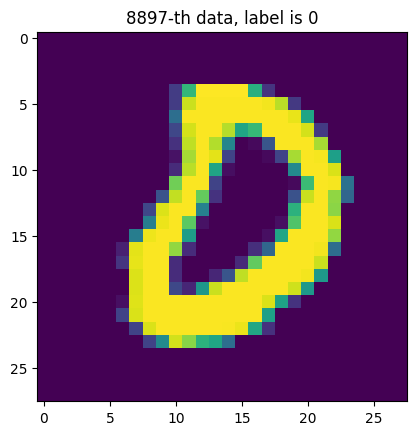

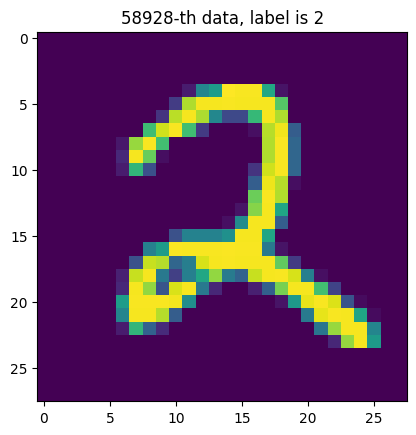

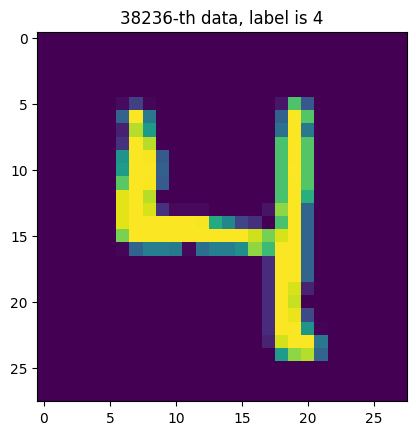

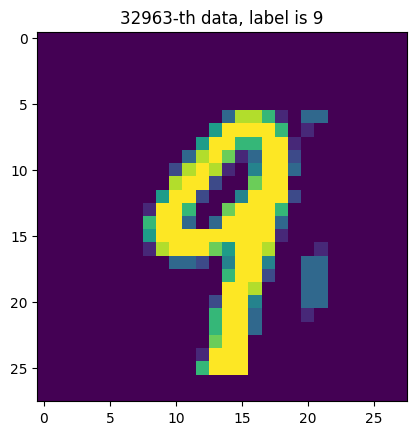

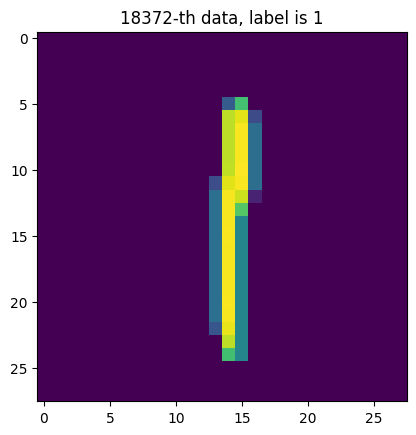

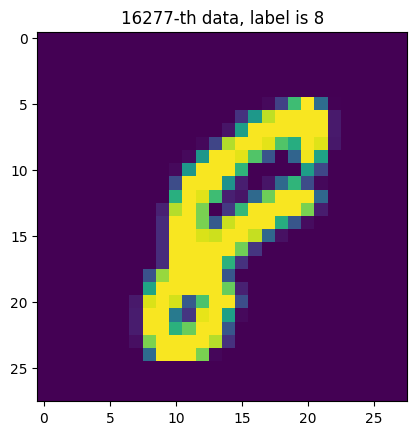

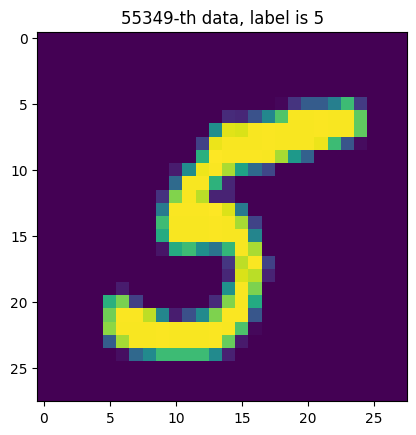

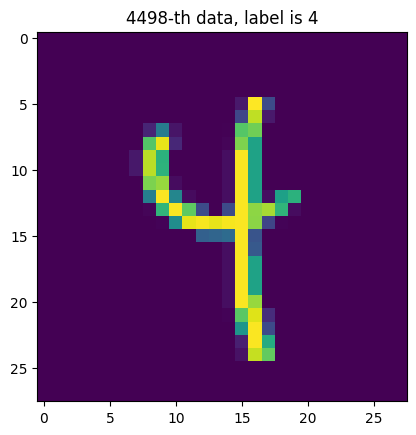

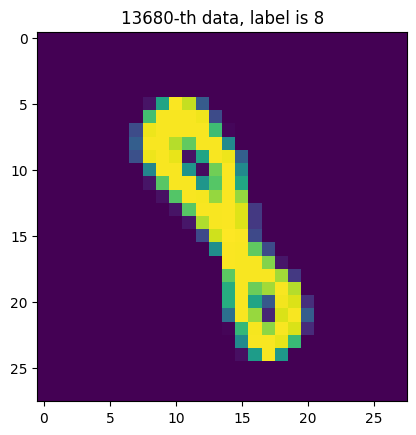

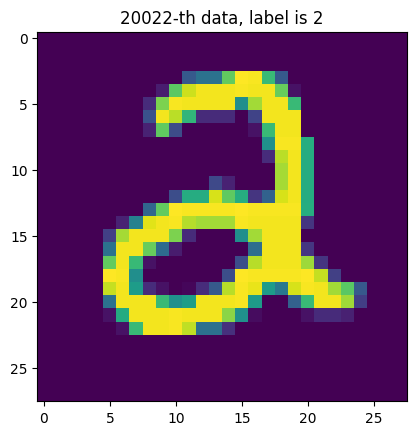

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 10
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

print(random_idx)

for idx in random_idx:
  img = X_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [ ]:
# 검증 데이터 만들기
#sklearn : machine learning package
from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.7/0.3 의 비율로 분리

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state =777) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
X_train.shape[0]

42000

In [ ]:
num_X_train = X_train.shape[0] #42000
num_X_val = X_val.shape[0]  #18000
num_X_test = X_test.shape[0] #10000

#모델에 입력하기 전 전처리 과정.
X_train = (X_train.reshape((num_X_train, 28*28))) / 255
#X_train = (X_train.reshape(X_train.shape[0],28*28)) / 255
# X_train = (X_train.reshape((60000, 28*28)))/ 255
X_val = (X_val.reshape((num_X_val, 28*28))) / 255
X_test = (X_test.reshape((num_X_test, 28*28)))/ 255

print(X_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경 / np.Flatten()와 비슷한 np.ravel()
#(Batch,Width,Height,channel) #4D Tensor
#(Batch,channel,width,Height)

(42000, 784)


In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

(28,28) 형태의 데이터를 784차원의 1차원 배열로 변환 한것을 볼 수 있다. 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리 과정이 필수.

이에 대한 큰 이유로는 그래디언트 손실과 그래디언트 폭발로 인해 학습이 진행되지 않기 때문. 우리가 숫자 이미지 데이터는 각 픽셀 값이 0~255의 범위에 있기 때문에 255로 나누어 줌.

**여러 가지의 전처리 방법- 스케일링 방법**

Normalization(Min Max) :  $X$ = ${\dfrac {x-x_{min}}{x_{max}-x_{min}}}$

Robust Normalization :  $X$ = ${\dfrac {x-x_{2/4}}{x_{3/4}-x_{1/4}}}$

Standardization : $X$ = ${\dfrac {x-x_{mean}}{x_{std}}}$

In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

# #각 데이터의 레이블을 범주형 형태로 변경.
num_classes=10

y_train = to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)
# print(y_train)

In [ ]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [ ]:
y_train.shape

(42000,)

## Softmax 함수

- 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.

<img src='https://mblogthumb-phinf.pstatic.net/MjAxNzA2MDVfNDMg/MDAxNDk2NTkwNTY2Njcx.-soSHRQ2urRoHGkkQk-OmHJ1HJIvpS3YuO1SXeecBAQg.LVPXD-PxQ5o8mK9uPMkqvp18vwjyKUypfRfYlqTv_B8g.JPEG.wideeyed/softmax_f.jpg?type=w2'>

<img src='https://resources.codeonweb.com/bucket/cached/3d/eb/3debe13595e70edb78dfe62fe562688a.png'>

In [ ]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m #exp의 오버플로우 방지  참고 : https://mkmehpp.tistory.com/2
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


범주형 형태로 바뀌기 귀찮다 -> loss = 'sparse_categorical_crossentropy'

binary -> loss = 'categorical_crossentropy'

-  Adam이란

<img src='https://t1.daumcdn.net/cfile/tistory/99E889415D15C0E61F'>

- 참고) https://light-tree.tistory.com/141

### 속도를 조정하는 방법.
- AdaGrad(Adaptive gradient)
    - 변수(가중치)의 업데이트 횟수에 따라 학습률을 조정하는 방법 . 많이 변화하지
     변수들의 학습률은 크게 하고, 많이 변화하는 변수들의 학습률은 작게 함.
     - 많이 변화한 변수는 최적값에 근접했을 것이라는 가정에 작은 크기로 이동하면서 세밀한 값을 조정하고, 반대로 적게 변화한 변수들은 크게하여 빠르게 loss값을 줄입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99098D365B1625AA29'>

- 이미지 출처 : https://twinw.tistory.com/247


- 파라미터마다 다른 학습률을 주기 위해 G함수를 추가함. 이 때 G값은 누적(기울기 크기의 누적)입니다.

- 기울기가 크면 G값이 커지기 때문에, ${\frac{\eta}{\sqrt{G(i)+ϵ}}}$에서 학습률($\eta$)은 작아집니다. 즉 파라미터가 많이 학습되었으면 작은 학습률로 업데이트되고, 파리멑 학습이 덜 되었으면 개선의 여지가 많기 때문에 높은 학습률로 업데이트 됨.

In [ ]:
#Tensorflow의 adagrad
from tensorflow.keras.optimizers.experimental import Adagrad
model.compile(optimizer = 'AdaGrad',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

- Adadelta(Adaptive delta)
    - AdaGrad에서 G값이 커짐에 따라 학습이 멈추는 문제를 해결하기 위해 등장한 방법.
    - Adadelta는 Adagrad의 수식에서 학습률($\eta$)을 D 함수(가중치의 변화량(Δ) 크기를 누적한 값)로 변환했기 때문에 학습률에 대한 하이퍼파라미터가 필요하지 않음.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9987494C5B1A22FD09'>

- 이미지 출처 : https://twinw.tistory.com/247

In [ ]:
#Tensorflow의 adadelta
from tensorflow.keras.optimizers import Adadelta
model.compile(optimizer = Adadelta(rho=0.95),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

- RMSProp
    - Adagrad의 $G(i)$ 갑싱 무한히 커지는 것을 방지하고자 제안된 방법.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F992C46455B162C7B0F'>    

- 이미지 출처 : https://twinw.tistory.com/247

- AdaGrad에서 학습이 안 되는 문제를 해결하기 위해 G함수에 $\gamma$만 추가 되었음.
- G값이 너무 크면 학습률이 작아져 학습이 안 될 수 있으므로 사용자가 $\gamma$값을 이용하여 학습률 크기를 비율로 조정할 수 있음.

In [ ]:
#Tensorflow의 RMSProp
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer =  RMSprop(lr=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

### 운동량을 조절하는 방법

- Momentum
    - 모멘텀이란 단어는 관성, 탄력, 가속도라는 뜻. 경사 하강법에 관성을 더해 주는 것.
    - 가중치를 수정하기 전에 이전 수정 방향(+,-)을 참조하여 같은 방향으로 일정한 비율만 수정하는 방법.
    - 수정이 양(+)의 방향과 음(-)의 방향으로 순차적으로 일어나는 지그재그 현상이 줄어들고, 이전 이동 값을 고려하여 일정 비율만큼 다음 값을 결정하므로 관성 효과를 얻을 수 있는 장점이 있음.
    - 모멘텀은 SGD와 함께 사용 됨.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A14F455B0CF54C21'>

- 이미지 출처 : https://twinw.tistory.com/247

In [ ]:
#Tensorflow의 Momentum
#SGD()의 파라미터로 모멘텀을 지정
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(lr=0.01, momentum=0.9),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

- Nesterov Accelerated Gradient, NAG

- momentum 값과 gradient값이 더해져 실제(Actual)값을 만드는 기존 모멘텀과 달리 momentum 값이 적용된 지점에서 gradient 값이 계산됨. gradient를 구할 때 분모($\partial w $의 W(가중치)에 먼저 MV(t-1)값을 더해 계산하는 것.

- 모멘텀 방법은 멈추어야 할 시점에도 관성에 의해 훨씬 멀리 갈 수 있는 단점이 있지만, NAG으로 절반 정도 이동한 후 어떤 방식으로 이동해야 하는지 다시 계산하여 결정하기 때문에 모멘텀 방법의 단점을 극복할 수 있음. 모멘텀 방법의 이점인 빠른 이동 속도는 그대로 가져가면서 멈추어야 할 시점에서 제동을 거는데 훨씬 용이함.

<img src='https://t1.daumcdn.net/cfile/tistory/996E494B5B0D03A003'>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99527A335B0CFF2E2B'>

- 이미지 출처 : https://twinw.tistory.com/247

<img src='https://miro.medium.com/max/1027/1*6MEi74EMyPERHlAX-x2Slw.png'>

- 이미지 출처 : https://miro.medium.com/max/1027

In [ ]:
#Tensorflow의 Nesterov Accelerated Gradient
#SGD()의 파라미터로 NAG을 지정
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(lr=0.01, momentum=0.9, nesterov=True),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

### 속도와 운동량에 대한 혼용 방법

- Adam(Adaptive Moment Estimation)
    - Momentum과 RMSprop를 합친 형태. RMSprop의 특징인 gradient의 제곱은 지수평균한 값을 사용하여 Momentum의 특징으로 gradient를 제곱하지 않은 값을 사용하여 지수평균을 구하고 수식을 활용함.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9996DA3C5B16331526'>

- 이미지 출처 : https://twinw.tistory.com/247

In [ ]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (X_val,y_val),
                    # validation_split=0.3,
                    verbose=1)

Epoch 1/30
329/329 [==============================] - 6s 8ms/step - loss: 0.5036 - acc: 0.8571 - val_loss: 0.2323 - val_acc: 0.9356
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.1981 - acc: 0.9430 - val_loss: 0.1763 - val_acc: 0.9482
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1516 - acc: 0.9555 - val_loss: 0.1477 - val_acc: 0.9576
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.1252 - acc: 0.9632 - val_loss: 0.1340 - val_acc: 0.9621
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.1058 - acc: 0.9696 - val_loss: 0.1263 - val_acc: 0.9627
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0916 - acc: 0.9735 - val_loss: 0.1166 - val_acc: 0.9655
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0787 - acc: 0.9765 - val_loss: 0.1167 - val_acc: 0.9657
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

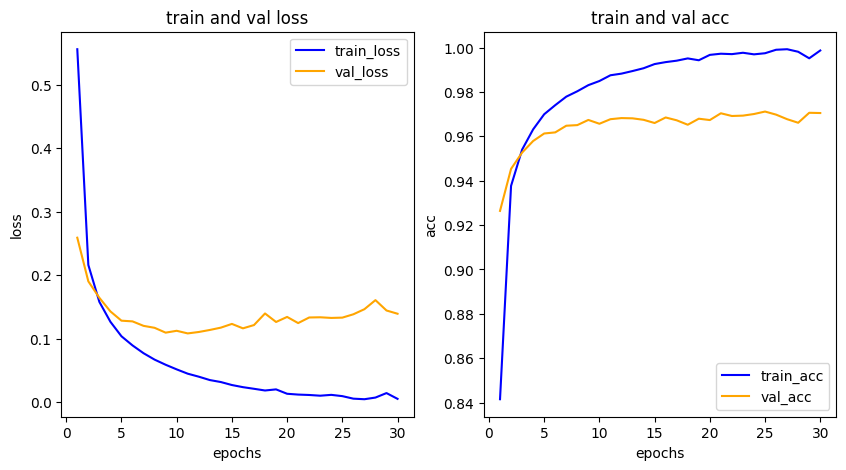

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

In [ ]:
# 모델 평가하기

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1449 - acc: 0.9719


[0.1448936015367508, 0.9718999862670898]

In [ ]:
import numpy as np

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

313/313 [==============================] - 1s 1ms/step
(10000, 10)
각 클래스에 속할 확률 :  [1.1490160e-12 6.5247781e-14 9.5235222e-08 6.4839733e-05 1.4344329e-18
 9.8737500e-13 4.6339862e-21 9.9993503e-01 6.9435976e-12 2.8570524e-09]


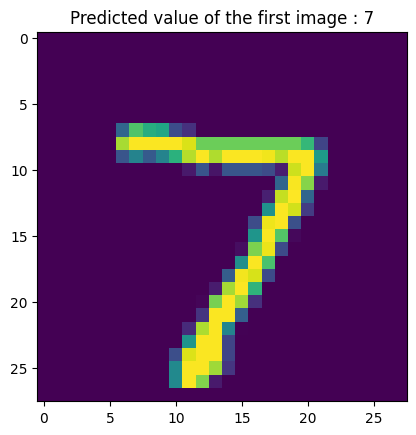

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

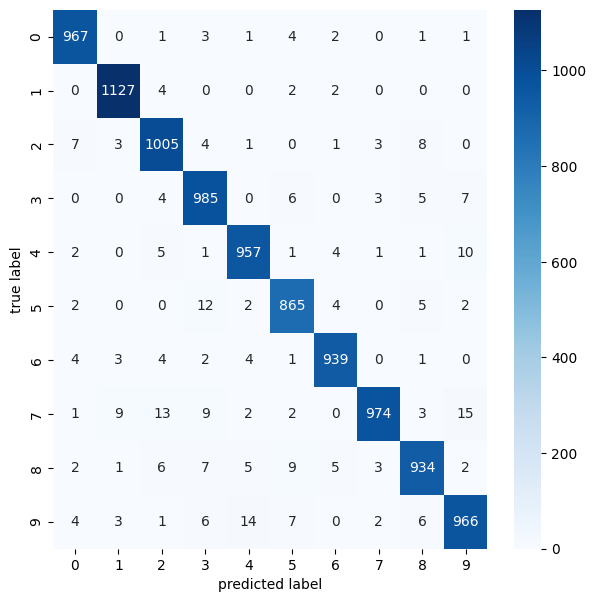

In [ ]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.->one-hot encoding
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 3.1 MNIST

이번 장에서는 필기체 숫자로 이루어진 'MNIST 데이터베이스'를 이용해 필기체 숫자 분류를 해보자. MNIST는 미국 인구조사국으 지기원들이 쓴 숫자와 고등학생들이 쓴 숫자로 만든 미국 국립표준기술연구소(NIST)의 데이터베이스를 다시 섞어 만든 필기체 숫자 이미지 데이터베이스이다.

MNIST 데이터는 딥러닝 예제에서 빠지지 않고 등장하는 데이터라고 할 수 있다.

![](./images/mnist.png)

### SetUp

In [ ]:
# 공통
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set()

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# warning 문구 무시하기 위함
import warnings
warnings.filterwarnings(action='ignore')

### MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])
#X = X.reshape([X.shape[0],28*28])

y = np.append(train_y, test_y)

print('X.shape :', X.shape)
print('y.shape :', y.shape)

X.shape : (70000, 784)
y.shape : (70000,)


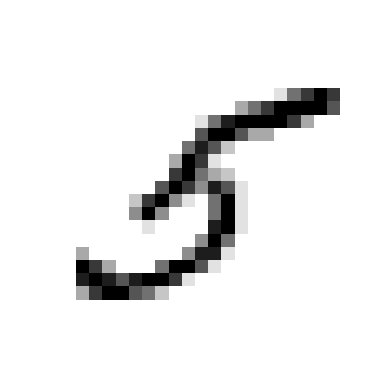

In [ ]:
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

MNIST 데이터셋을 Train Set과 Test Set을 나누어 보자.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (60000, 784)
X_test.shape : (10000, 784)
y_train.shape : (60000,)
y_test.shape : (10000,)


## 3.2 이진 분류기 훈련

문제를 단순화하기 위해 하나의 숫자 5만 식별하는 분류기를 구현해보자. 숫자가 5인지 아닌지를 분류하는 **이진 분류기**(binary classifier)를 분류 해본다.

In [ ]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [ ]:
np.where(y_train == 5)

(array([    8,    11,    25, ..., 59928, 59942, 59965]),)

In [ ]:
a = np.arange(10)
print(np.where(a%2==0, '짝수','홀수'))

['짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수']


이제 Scikit-Learn의 `SGDClassifier`를 이용해 분류기를 구현해보도록 하자. `SGDClassifier`는 **확률적 경사 하강법**(Stochastic Gradient Descent)을 이용한 Linear classifiers (SVM, logistic regression, a.o.)이다. 디폴트 값으로는 `loss='hinge'`이며, linear SVM을 이용해 분류기를 학습한다.

`SGDClassifier`는 매우 큰 데이터셋을 효율적으로 처리하는 장점이 있다.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
#max_iter : 계산에 사용할 작업 수(default=1000), random_state : 난수 seed 고정
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [ ]:
# some_digit = X[35]
sgd_clf.predict([some_digit])

array([False])

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.964 , 0.9579, 0.9571])

아래의 예제코드는 위의 `cross_val_score`과 같은 기능을 하는 교차 검증 기능을 `StratifiedKFold`를 이용해 직접 구현한 코드이다. `StratifiedKFold`는 클래스별 비율이 유지되도록 폴드(Fold)를 만들기 위해 계층적 샘플링을 수행한다.

출력 결과는 위의 결과와 동일한 결과가 출력된다.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)
skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # sgd_clf 복제
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.964
0.9579
0.9571


모든 이미지를 `5가 아님`으로 분류하는 더미 분류기를 만들어 보자.

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

위의 결과에서 알 수 있듯이, 모든 숫자를 `5가 아님`으로 분류해도 정확도가 90% 이상이다. 그 이유는 전체 데이터셋 중 10% 정도만이 숫자 5이기 때문이다.

따라서, 정확도(accuracy)를 성능 측정 지표로 사용하는 것은 **불균형한 데이터셋**을 다룰 때 유용하지 않다.

### 3.3.2 오차 행렬 (Confusion Matrix)

분류기(classifier)의 성능을 평가하는 더 좋은 방법은 오차행렬(confusion matrix)를 살펴보는 것이 좋다.

- **TP** : True-Positive, 1이라고 예측했는데, 실제로도 1인 경우 → **정답**
- **TN** : True-Negative, 0이라고 예측했는데, 실제로도 0일 경우 → **정답**
- **FP** : False-Positive, 1이라고 예측했는데, 실제로는 0인 경우
- **FN** : False-Negative, 0이라고 예측했는데, 실제로는 1인 경우

![](./images/confusion_matrix.jpg)

`cross_val_predict()`는 K-Fold CV를 수행하면서 score값이 아닌 각 테스트 폴드(test fold)에서 얻은 예측 값을 반환한다.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [ ]:
y_train_pred.shape

(60000,)

`confusion_matrix()`에서 행은 **실제 클래스**를 나타내고 열은 **예측한 클래스**를 나타낸다.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred )

array([[54058,   521],
       [ 1899,  3522]])

In [ ]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### 3.3.3 정밀도와 재현율

#### Precision (정밀도)

- 모델이 Positive라고 예측한 것들 중 True Positive(TP)인 비율

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8711352955725946

#### Recall (재현율)

- 실제 True인 데이터 중(TP + FN)에 모델이 정확하게 맞춘(TP)의 비율

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

#### $\text{F}_{1}$ Score

$$
\text{F}_{1} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7442941673710904

### 3.3.4 정밀도/재현율 Trade-Off

- 정밀도(Precision)과 재현율(Recall)은 서로 Trade-off 관계를 가짐

- 예를들어, 고객에게 추천할 항목이 줄어들어도 정확한 항목을 추천하려면, 정밀도가 높은 모델이 좋으며

- 불량품을 걸러낼 때는, 정상인 품목이 어느정도 포함되더라도 재현율이 높은 모델이 좋음

![](./images/tradeoff.png)

- `sklearn`에서 분류기의 `decision_function()`을 사용하면 각 샘플(데이터포인트)의 점수를 얻을 수 있음
-  scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수 : decision_function, predict_proba

In [ ]:
# some_digit = X[35]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-9737.0785024])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = -200000
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
y_scores.shape

(60000,)

In [ ]:
y_scores

array([-545086.1906455, -200238.2063272, -366873.7617279, ...,
       -626454.8445428, -716313.7493135, -581950.0460115])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

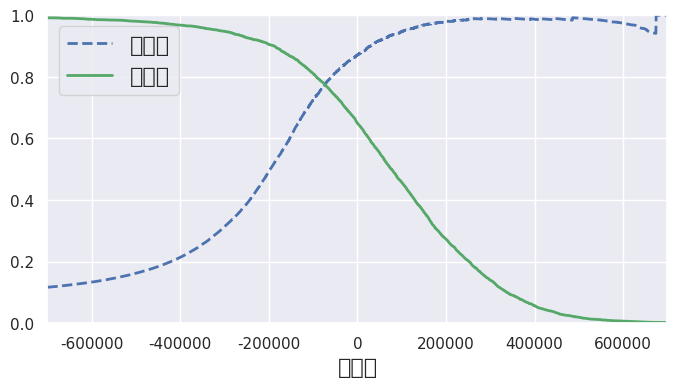

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

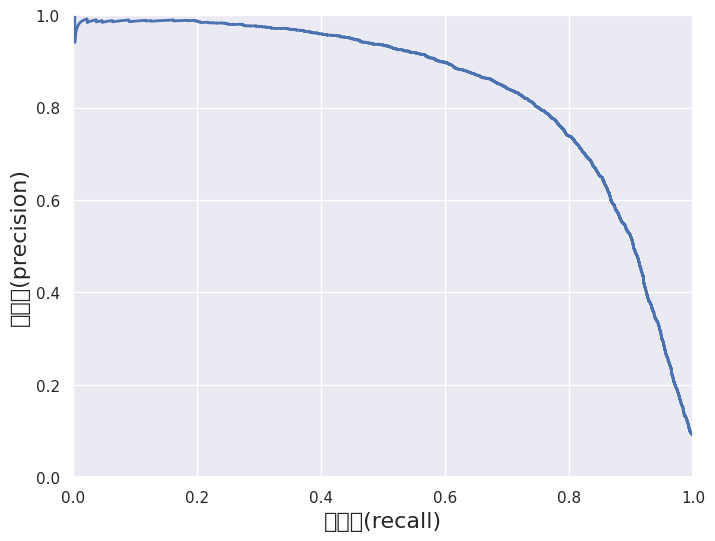

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율(recall)", fontsize=16)
    plt.ylabel("정밀도(precision)", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Precision/Recall Trade-off는 위의 그래프에서 하강점 직전, 즉 0.6(60%) 지점을 선택하는 것이 좋다. 물론 이러한 선택은 프로젝트에 따라 다르다.

만약, 정밀도(Precision)을 90% 달성하는 것이 목표라고 하면, 임계값(threshold)을 조정하여 구할 수 있다.

In [ ]:
y_train_pred_90 = (y_scores > 110000)
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9520383693045563

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4394023242944106

하지만, 위의 결과에서도 볼 수 있듯이, 정밀도가 올라가면 재현율은 떨어지기 마련이다. 따라서, 정밀도가 높지만 재현율이 낮은 분류기는 유용하지 않다.

> 누군가가 '99% 정밀도를 달성하자'라고 하면 반드시 '재현율 얼마에서?'라는 질문을 던져야 한다!

### 3.3.5 ROC 곡선

ROC(Receiver Operating Characteristic, 수신자 조작 특성)곡선 또한 이진 분류에서 주로 사용한다. ROC 곡선은 **False-Positive Rate(FPR)** 에 대한 **True-Positive Rate(TPR = Recall)** 의 곡선이다.

FPR은 1에서 TNR(True-Negative Rate)를 뺀 값과 같다. TNR은  **특이도**(Specificity)라고도 한다.

$$
FPR = \frac{FP}{FP + TN} = \frac{FP + TN - TN}{FP + TN} = 1 - \frac{TN}{FP + TN} = 1 - TNR
$$

따라서, ROC 곡선은 **민감도(재현율, Recall)** 에 대한 **1 - 특이도** 그래프이다.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

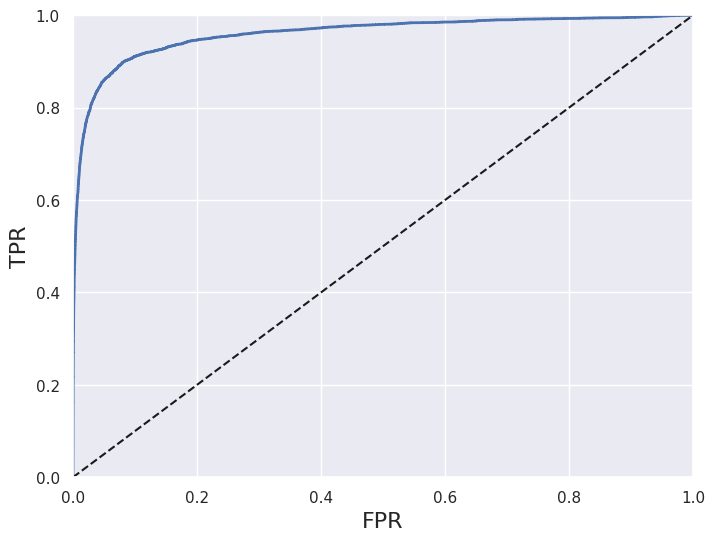

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

위의 ROC 곡선에서도 trade-off가 있다. 재현율(TPR, Recall)이 높을수록 FPR이 증가한다. 점선은 랜덤한 분류기의 ROC곡선을 의미하며, 성능이 좋은 분류기는 점선에서 부터 최대한 멀리 떨어져야한다(왼쪽 위 모서리).

**AUC**(Area Under the Curve)을 측정하면 분류기들을 성능을 비교할 수 있다. AUC는 1에 가까울 수록 좋은 분류기이다.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

아래의 코드는 SGDClassifier와 RandomForestClassifier의 ROC 곡선과 AUC를 비교하는 코드이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 점수는 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

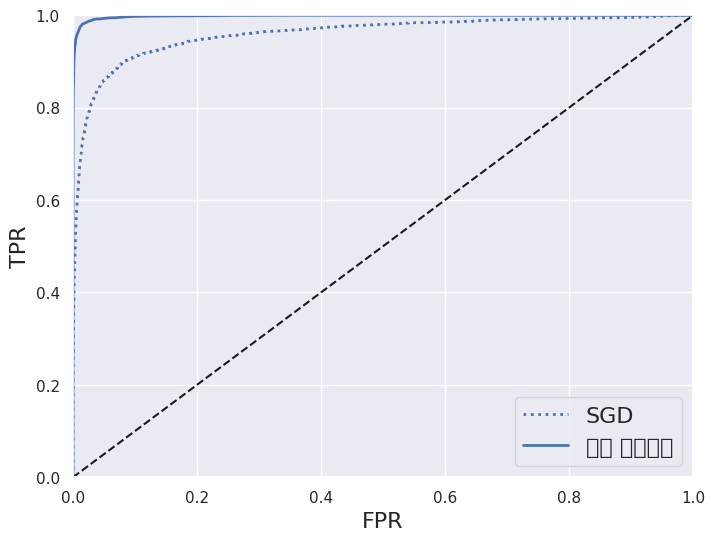

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983631764491033

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9890893831305078

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8695812580704667

## 3.4 다중 분류

다중 분류(multiclass/multinomial classification)는 말그대로 둘 이상의 클래스로 분류하는 것을 말한다.

RandomForest나 Naive Bayes같은 알고리즘은 알고리즘에서 직접 다중 분류가 가능하지만, SVM이나 Logistic Regression같은 알고리즘은 이진 분류(binary classification)만 가능하다.

하지만, 이러한 이진 분류 알고리즘을 여러 번 사용해 다중 클래스를 분류할 수 있는 기법(트릭)이 있다.

#### OvA(One versus All, One versus the rest, OvR)

**OvA(일대다)** 방법은 예를 들어, MNIST 데이터에서 특정 숫자 하나만 분류하는 (1인지 아닌지?, 2인지 아닌지?) 이진 분류기를 10개 만들어 그 중 가장 높은 확률(점수)값을 가지는 클래스로 분류해주는 방법이다.

![](./images/ovr.png)

#### OvO(One versus One)

**OvO(일대일)** 방법은 0과 1, 0과 2, 1과 2 구별 등과 같이 각 클래스의 조합마다 이진 분류기를 만들어 학습시키는 방법이다. 이 방법은 클래스가 $N$개인 경우 $\frac{N \times \left( N-1 \right)}{2}$ 개가 필요하다.

$$
\binom{N}{2} = \frac{N!}{2! \left(N-2\right)!} = \frac{N \times \left( N-1 \right)}{2}
$$

MNIST의 경우에는 45개의 분류기를 만들어 가장 많이 Positive로 분류된 클래스를 선택한다.

SVM같은 알고리즘은 Train Set의 크기에 민감하기 때문에 작은 Train Set에서 여러개의 분류기를 학습시키는 것이 빠르기 때문에 OvO를 사용하지만, 대부분의 이진 분류 알고리즘은 OvA를 사용한다.

Scikit-Learn에서는 이진 분류 알고리즘을 이용해 다중 분류를 수행할 경우 자동으로 OvA(또는 SVM일 경우 OvO)를 적용해 학습한다.

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-316862.8330171, -126087.5711512, -323328.0153372,
        -172686.0883052, -151770.5145894,  125765.878306 ,
        -532184.2002291, -505026.022637 ,  -68942.927758 ,
        -426178.3083723]])

In [ ]:
np.argmax(some_digit_scores)

5

Scikit-Learn에서 OvO나 OvA를 사용하도록 `OneVsOneClassifier`나 `OneVsRestClassifier`를 이용해 지정할 수 있다.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42))

In [ ]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovo_clf.estimators_)

45

RandomForest 같은 알고리즘은 알고리즘 자체에서 다중 클래스로 분류할 수 있기 때문에 OvA, OvO 같은 방법이 필요하지 않다.

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.03, 0.  , 0.95, 0.  , 0.  , 0.01, 0.  ]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83935, 0.85125, 0.8676 ])

#### StandardScaler를 이용해 데이터 스케일 조정하기

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91155, 0.91005, 0.9095 ])

## 3.5 에러 분석

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5722,    2,   28,    9,    8,   49,   51,   11,   41,    2],
       [   2, 6494,   47,   23,    6,   42,    5,   10,  100,   13],
       [  51,   37, 5360,   88,   82,   23,   96,   56,  149,   16],
       [  51,   37,  149, 5318,    2,  248,   37,   57,  134,   98],
       [  19,   25,   39,    8, 5378,    7,   54,   29,   77,  206],
       [  73,   42,   35,  170,   73, 4622,  105,   30,  177,   94],
       [  31,   24,   43,    2,   43,   88, 5635,    4,   47,    1],
       [  20,   20,   65,   27,   58,   11,    6, 5806,   12,  240],
       [  53,  147,   78,  164,   11,  163,   56,   24, 5017,  138],
       [  42,   27,   25,   87,  175,   34,    3,  201,   85, 5270]])

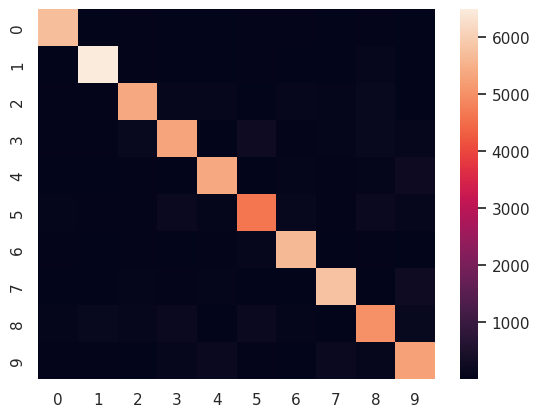

In [ ]:
sns.heatmap(conf_mx);

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

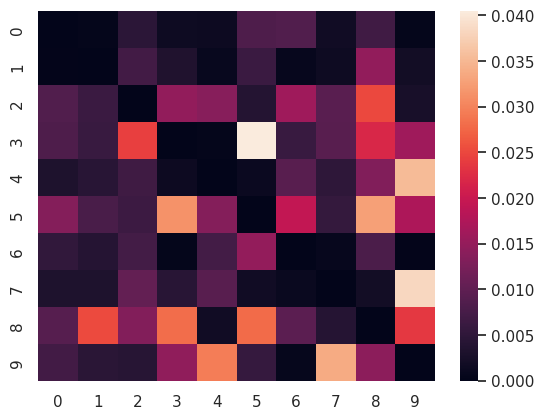

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx);

In [ ]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

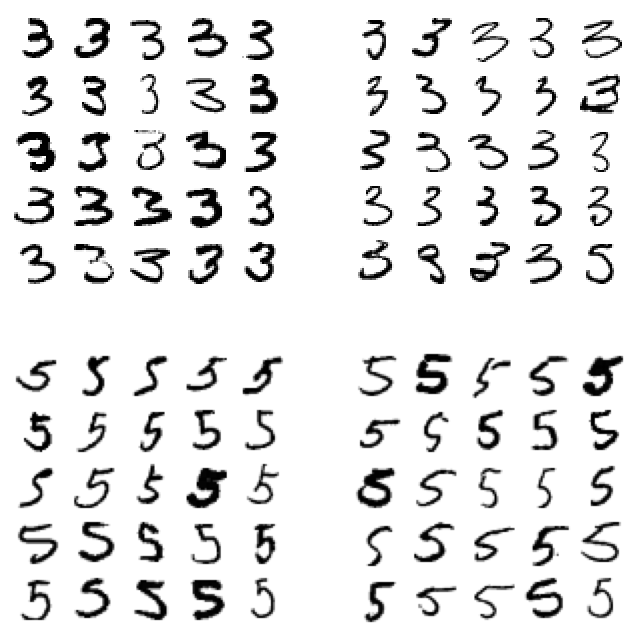

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 3.6 다중 레이블 분류

위에서 살펴본 내용은 데이터가 하나의 클래스에만 분류되는 경우만 살펴보았다. 하지만, 데이터에 따라 여러개의 클래스에 분류해야하는 경우가 있다. 이러한 경우를 **다중 레이블 분류**(multilabel classification)이라고 한다.

아래의 예제는 `kNN`알고리즘을 이용한 `KNeighborClassifier` 분류기를 사용해 첫번째 클래스는 7보다 크거나 같은지(`>=7`), 두 번째 클래스는 홀수(odd)인지를 분류하는 다중 레이블 분류 예제이다.

![](./images/multiclass_multilabel.png)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])  # == 5

array([[False,  True]])

In [ ]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.9768224011622285
CPU times: user 880 ms, sys: 336 ms, total: 1.22 s
Wall time: 2min 32s


## 3.7 다중 출력 분류

- 아래의 예제는 MNIST 이미지에 대해 노이즈를 추가한 뒤 노이즈를 제거하는 분류기를 통해 다중출력 분류(multioutput calssification) 예시를 만듦

- 분류기의 출력이 multi-label(픽셀당 한 레이블)이고 각 레이블은 여러개의 값을 가짐(0 ~ 255 픽셀)

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

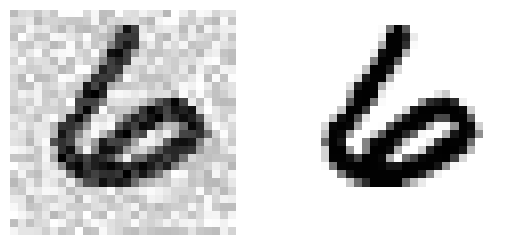

In [ ]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

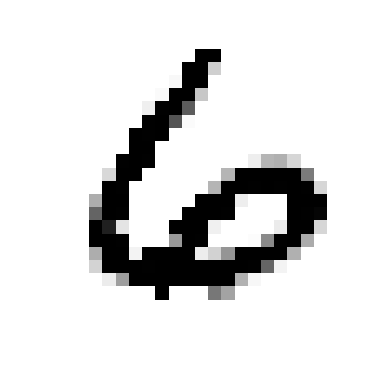

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

- MNIST 예제를 다시 한번 해보자.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

- 텐서플로를 사용해 첫 번 째 예제를 밑바닥부터 다시 구현하기
    - 단순한 Dense 클래스

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

- 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

- 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

- 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

- 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

- 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

## HW) Fashion MNIST에서도 동일하게 해보자.

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

multi-classification -> label->one hot encoding을 해야하는 것인가? or 데이터를 전처리 해야되는가?

encoding->loss = 'categorical_crossentropy'
encoding X ->loss = 'sparse_categorical_crossentropy'

In [ ]:
#데이터 전처리

train_images = train_images / 255.0
test_images = test_images / 255.0

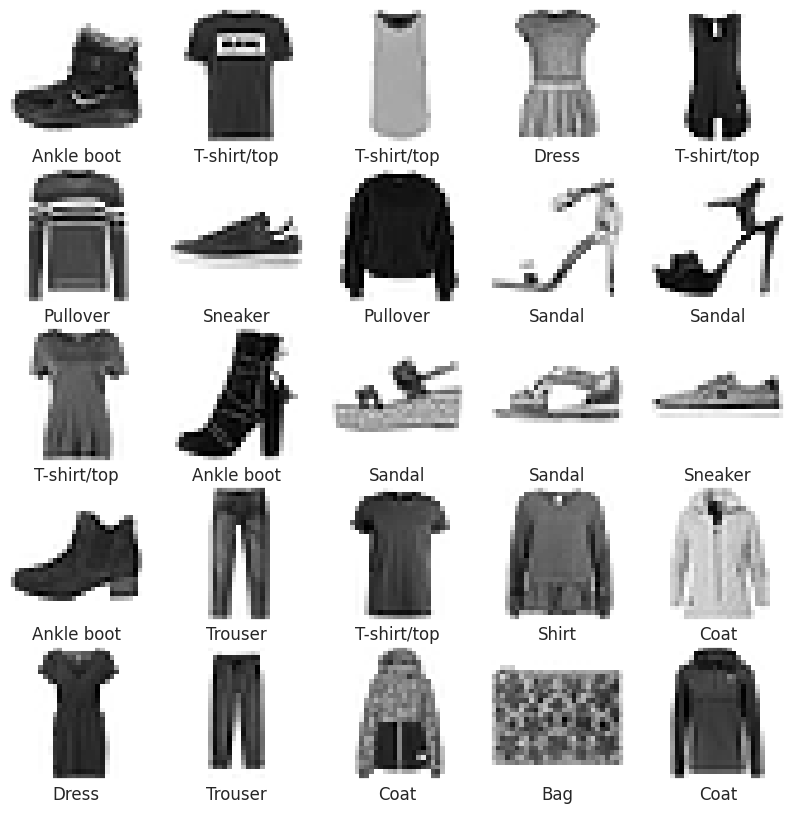

In [ ]:
# 데이터 plot
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for i in range(25):
  # print(i) #i=0 subplot(5,5,0) : 불가능. 25칸이 있는데, 0번부터 찍어주세요.
  plt.subplot(5,5,i+1) #i는 0부터 시작하기 때문에.
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary) #gray_scale이기 때문에.
  plt.xlabel(class_names[train_labels[i]])
plt.show() #전체를 누적해서 그려주세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.fit(train_images, train_labels, epochs= 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5402 - acc: 0.8072 - val_loss: 0.4386 - val_acc: 0.8433
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3885 - acc: 0.8579 - val_loss: 0.4013 - val_acc: 0.8568
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3479 - acc: 0.8733 - val_loss: 0.3616 - val_acc: 0.8642
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3247 - acc: 0.8806 - val_loss: 0.3434 - val_acc: 0.8712
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3082 - acc: 0.8863 - val_loss: 0.3702 - val_acc: 0.8702
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2933 - acc: 0.8912 - val_loss: 0.3397 - val_acc: 0.8780
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2762 - acc: 0.8965 - val_loss: 0.3319 - val_acc: 0.8797
Epoch 8/10
1688/1688 [==============================] - 7s 4m

# 정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose = 2) # verbose = 0 아무것도 안보임
# verbose = 1 progress bar / verbose :2 결과만

313/313 - 1s - loss: 0.3480 - acc: 0.8790 - 612ms/epoch - 2ms/step


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([5.2885180e-06, 2.9691782e-05, 1.2917382e-05, 4.3098862e-05,
       2.4763407e-05, 4.5696720e-03, 4.4569242e-05, 2.7788518e-02,
       7.0088038e-07, 9.6748078e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  #image내에 array : pixel을 가져 오는 것 img : 실제 이미지이고, predictions_array->예측 한것 (데이터로 부터)
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) #gray_scale

  predicted_label = np.argmax(predictions_array)
  #predictions_array->예측 한것 (데이터로 부터)->최대인 label을 뽑아주세요.
  if predicted_label == true_label: #예측한 라벨 == 실제 라벨
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #hex color : 색의 혼합.
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

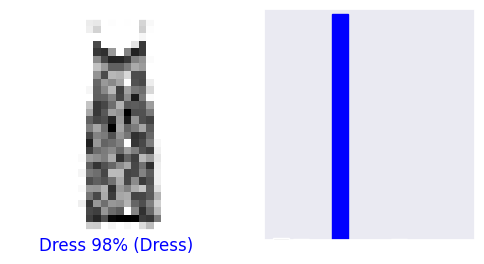

In [ ]:
i = 300
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

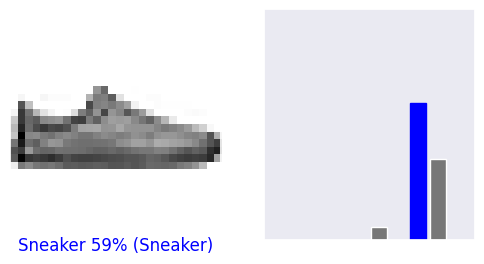

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

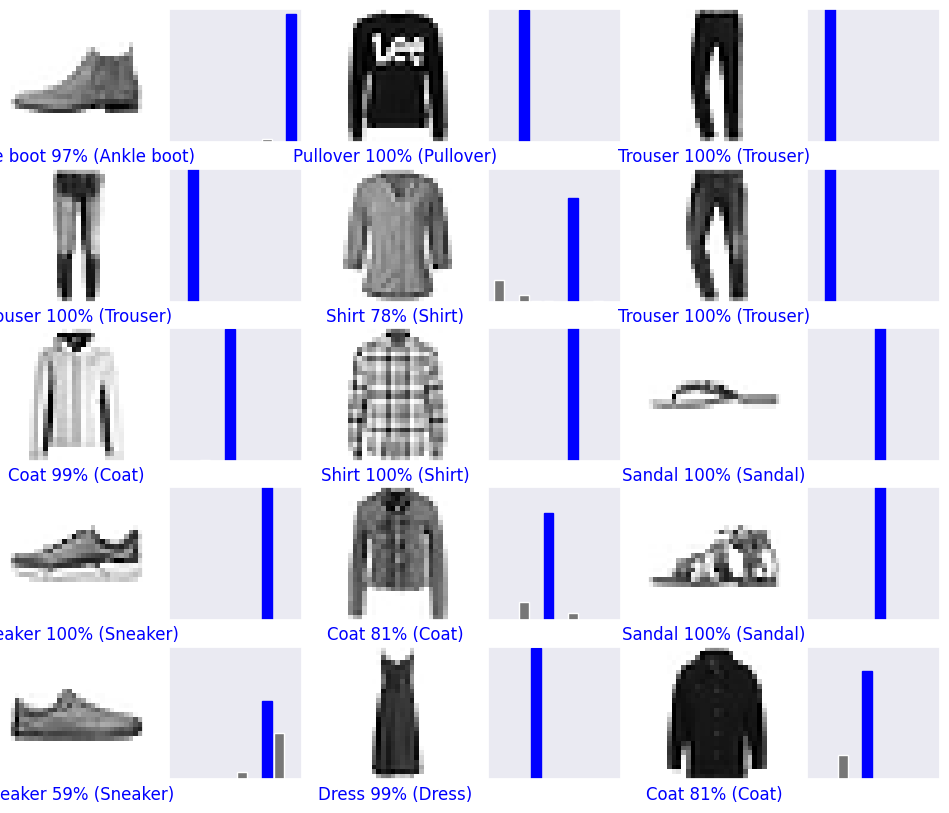

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
#plt.figure(figsize = (10,10))
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) #i=0부터 출발하니깐, i+1
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2) # 그 옆에 hist를 그려주세요.
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[5.2885180e-06 2.9691782e-05 1.2917370e-05 4.3098862e-05 2.4763407e-05
  4.5696744e-03 4.4569202e-05 2.7788544e-02 7.0088038e-07 9.6748078e-01]]


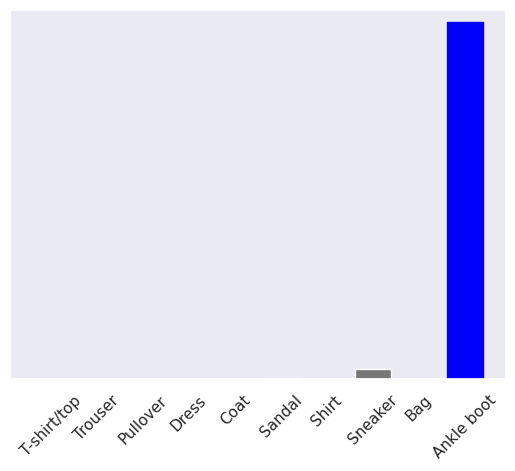

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

- IMDB 이진 분류  하기
 - 인터넷 영화 데이터베이스로부터 가져온 5만 개의 리뷰,25000개의 훈련데이터, 25000개의 테스트 데이터로 나뉘어 졌고, 각각 50%의 부정리뷰, 50% 긍정 리뷰로 구성되어 있음.
 - num_words : 훈련 데이터에서 가장 자주 나타는 단어 1만개만 사용

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

## 데이터 준비
 - 숫자 리스트는 신경망에 들어갈 수가 없기 때문에 리스트를 텐서로 바꿔줘야 한다.원-핫 인코딩을 통해 0과 1의 벡터로 변환하는 방법.

In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences), dimension))
    # 크기가 len(sequences, dimension) 이고 모든 원소가 0인 행렬 생성.
    for i,sequences in enumerate(sequences):
        result[i,sequences] = 1.0 #result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return result

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

imdb = Sequential()

imdb.add(Dense(64, activation = 'relu', input_shape = (10000, ) ) )
imdb.add(Dense(32, activation = 'relu'))
imdb.add(Dense(1, activation = 'sigmoid'))
imdb.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                640064    
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imdb.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

- 훈련 검증

In [ ]:
X_valid = X_train[:10000]
partial_X_train = X_train[10000:]
y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
hist_imb = imdb.fit(partial_X_train,partial_y_train,epochs=50,
                    batch_size=512, validation_data=(X_valid,y_valid))

Epoch 1/50
30/30 [==============================] - 4s 87ms/step - loss: 0.5062 - accuracy: 0.7592 - val_loss: 0.3431 - val_accuracy: 0.8685
Epoch 2/50
30/30 [==============================] - 1s 33ms/step - loss: 0.2844 - accuracy: 0.8955 - val_loss: 0.3307 - val_accuracy: 0.8645
Epoch 3/50
30/30 [==============================] - 1s 30ms/step - loss: 0.2235 - accuracy: 0.9147 - val_loss: 0.2761 - val_accuracy: 0.8866
Epoch 4/50
30/30 [==============================] - 1s 29ms/step - loss: 0.1785 - accuracy: 0.9361 - val_loss: 0.3029 - val_accuracy: 0.8781
Epoch 5/50
30/30 [==============================] - 1s 26ms/step - loss: 0.1387 - accuracy: 0.9519 - val_loss: 0.2915 - val_accuracy: 0.8855
Epoch 6/50
30/30 [==============================] - 1s 24ms/step - loss: 0.1137 - accuracy: 0.9595 - val_loss: 0.3348 - val_accuracy: 0.8777
Epoch 7/50
30/30 [==============================] - 1s 23ms/step - loss: 0.0955 - accuracy: 0.9687 - val_loss: 0.3248 - val_accuracy: 0.8828
Epoch 8/50
30

In [ ]:
loss, accuracy = imdb.evaluate(X_test, y_test)